# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,  ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
import warnings
warnings.filterwarnings("ignore") 

# Importing and Exploration of Dataset

In [2]:
url = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [3]:
url.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
url.shape

(235795, 56)

In [5]:
url.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

<hr>

<span style="font-size:20px">Column FILENAME is of no significance as given in description of dataset, therefore we can drop this column.</span>

In [6]:
url = url.drop(columns=["FILENAME"])

In [7]:
url.shape

(235795, 55)

In [8]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [9]:
url.describe().T

,count,mean,std,min,25%,50%,75%,max
URLLength,235795.0,34.573095,41.314153,13.000000,23.000000,27.000000,34.000000,6.097000e+03
DomainLength,235795.0,21.470396,9.150793,4.000000,16.000000,20.000000,24.000000,1.100000e+02
IsDomainIP,235795.0,0.002706,0.051946,0.000000,0.000000,0.000000,0.000000,1.000000e+00
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.000000,100.000000,1.000000e+02
CharContinuationRate,235795.0,0.845508,0.216632,0.000000,0.680000,1.000000,1.000000,1.000000e+00
TLDLegitimateProb,235795.0,0.260423,0.251628,0.000000,0.005977,0.079963,0.522907,5.229071e-01
URLCharProb,235795.0,0.055747,0.010587,0.001083,0.050747,0.057970,0.062875,9.082366e-02
TLDLength,235795.0,2.764456,0.599739,2.000000,2.000000,3.000000,3.000000,1.300000e+01
NoOfSubDomain,235795.0,1.164758,0.600969,0.000000,1.000000,1.000000,1.000000,1.000000e+01
HasObfuscation,235795.0,0.002057,0.045306,0.000000,0.000000,0.000000,0.000000,1.000000e+00


<hr>

<span style="font-size:20px">Renaming some columns to their correct spelling so that we do not have to face issues in future while passing this columns names.</span>

In [10]:
url.rename(
    columns={
        "NoOfDegitsInURL": "NoOfDigitsInURL",
        "DegitRatioInURL": "DigitRatioInURL",
        "SpacialCharRatioInURL": "SpecialCharRatioInURL"
    },
    inplace=True  
)

# Null Values

In [11]:
url.isna().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDigitsInURL               0
DigitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpecialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

<hr>
<span style="font-size:20px">No null values present</span>
<hr>

# Duplicates

In [12]:
url.duplicated().sum()

np.int64(0)

<hr>
<span style="font-size:20px">No duplicates present</span>
<hr>

# Handling categorical columns
<span style="font-size:20px">Unique values per categorical column<span>

In [13]:
[print(f"{col} : {url[col].nunique()}") for col in url.select_dtypes(include="object").columns]

URL : 235370
Domain : 220086
TLD : 695
Title : 197874


[None, None, None, None]

In [14]:
url = url.drop(
    columns=['URL', 'Domain', 'Title']
)
url.shape

(235795, 52)

<span style="font-size:20px">The original URL column has been dropped, as all relevant features have already been extracted from it and the raw URL is no longer needed for model training. Similarly, the Domain column, being a substring of the URL, contributes only one derived feature that has also been extracted separately, making the column redundant. The Title column was also removed, as it holds limited significance for the core objective of this model; distinguishing between phishing and legitimate URLs. The only useful aspect of the Title is its presence, which has already been encoded as a feature. However, in future iterations, the Title could be explored further using NLP techniques to extract potential phishing-related keywords.</span>
<hr>

# Encoding

<span style="font-size:20px">Frequency encoding is used for the TLD column because one-hot encoding would add 695 columns, increasing complexity, while label encoding would assign arbitrary numbers from 0 to 694, which do not provide meaningful information. Additionally, frequency encoding is well-suited for tree-based models, as they can effectively split on numerical values and leverage frequency information for better pattern recognition.</span>

In [15]:
frequency = url['TLD'].value_counts().to_dict()
url["TLD_Frequency"] = url['TLD'].map(frequency)

In [16]:
url[["TLD", "TLD_Frequency"]].head()

,TLD,TLD_Frequency
0,com,112554
1,de,3996
2,uk,6395
3,com,112554
4,org,18793


In [17]:
num_feats = [col for col in url.select_dtypes(exclude='object').columns if url[col].nunique() > 2]
num_feats.sort()
num_feats

['CharContinuationRate',
 'DigitRatioInURL',
 'DomainLength',
 'DomainTitleMatchScore',
 'LargestLineLength',
 'LetterRatioInURL',
 'LineOfCode',
 'NoOfAmpersandInURL',
 'NoOfCSS',
 'NoOfDigitsInURL',
 'NoOfEmptyRef',
 'NoOfEqualsInURL',
 'NoOfExternalRef',
 'NoOfImage',
 'NoOfJS',
 'NoOfLettersInURL',
 'NoOfObfuscatedChar',
 'NoOfOtherSpecialCharsInURL',
 'NoOfPopup',
 'NoOfQMarkInURL',
 'NoOfSelfRef',
 'NoOfSubDomain',
 'NoOfiFrame',
 'ObfuscationRatio',
 'SpecialCharRatioInURL',
 'TLDLegitimateProb',
 'TLDLength',
 'TLD_Frequency',
 'URLCharProb',
 'URLLength',
 'URLSimilarityIndex',
 'URLTitleMatchScore']

In [18]:
bool_feats = [col for col in url.select_dtypes(exclude='object').columns if url[col].nunique() == 2]
bool_feats.sort()
bool_feats

['Bank',
 'Crypto',
 'HasCopyrightInfo',
 'HasDescription',
 'HasExternalFormSubmit',
 'HasFavicon',
 'HasHiddenFields',
 'HasObfuscation',
 'HasPasswordField',
 'HasSocialNet',
 'HasSubmitButton',
 'HasTitle',
 'IsDomainIP',
 'IsHTTPS',
 'IsResponsive',
 'NoOfSelfRedirect',
 'NoOfURLRedirect',
 'Pay',
 'Robots',
 'label']

# Outliers Handling

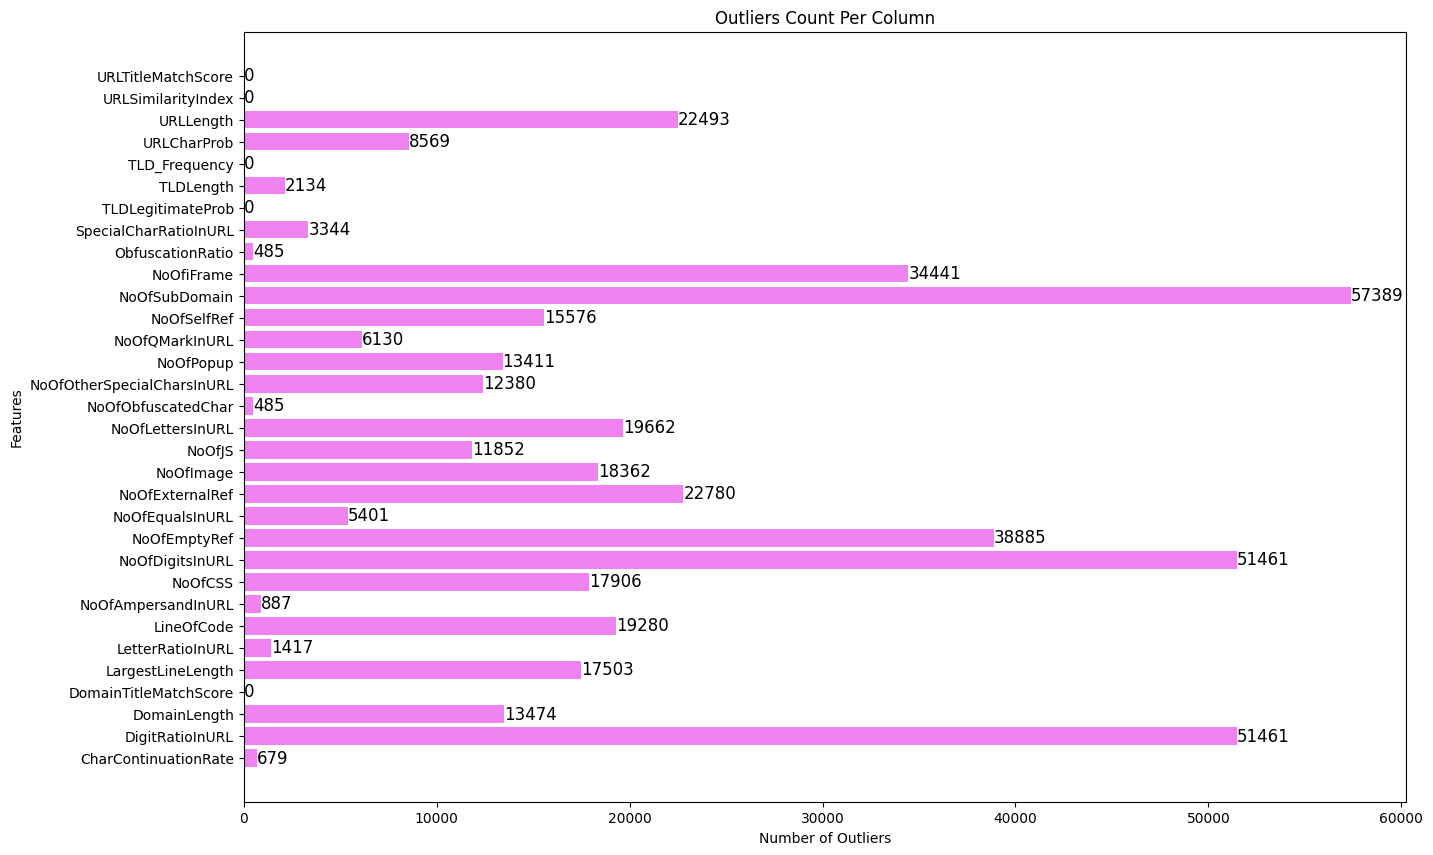

In [19]:
outlier_counts = {}

for col in num_feats: 
    Q1 = url[col].quantile(0.25) 
    Q3 = url[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_counts[col] = ((url[col] < lower_bound) | (url[col] > upper_bound)).sum()

cols = list(outlier_counts.keys())
counts = list(outlier_counts.values())

plt.figure(figsize=(15, 10))
bars = plt.barh(y=cols, width=counts, color='violet')  
plt.xlabel('Number of Outliers')
plt.ylabel('Features')
plt.title('Outliers Count Per Column')
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 6, bar.get_y() + bar.get_height()/2, str(count), va='center', fontsize=12)
plt.show()

<span style="font-size:20px">Removing these much outliers is not an option, so insetead we will cap them.<br>First testing on copy of original dataframe and then we will see if it is disturbing correlation or not.</span>

In [20]:
def cap_outliers(df, dist_feats, threshold):
    capped_df = df.copy()
    
    for col in dist_feats:
        Q1 = capped_df[col].quantile(0.25)
        Q3 = capped_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        capped_df[col] = capped_df[col].clip(lower=lower_bound, upper=upper_bound)
    return capped_df

In [21]:
url_without_outliers = cap_outliers(url, num_feats, 1.5)

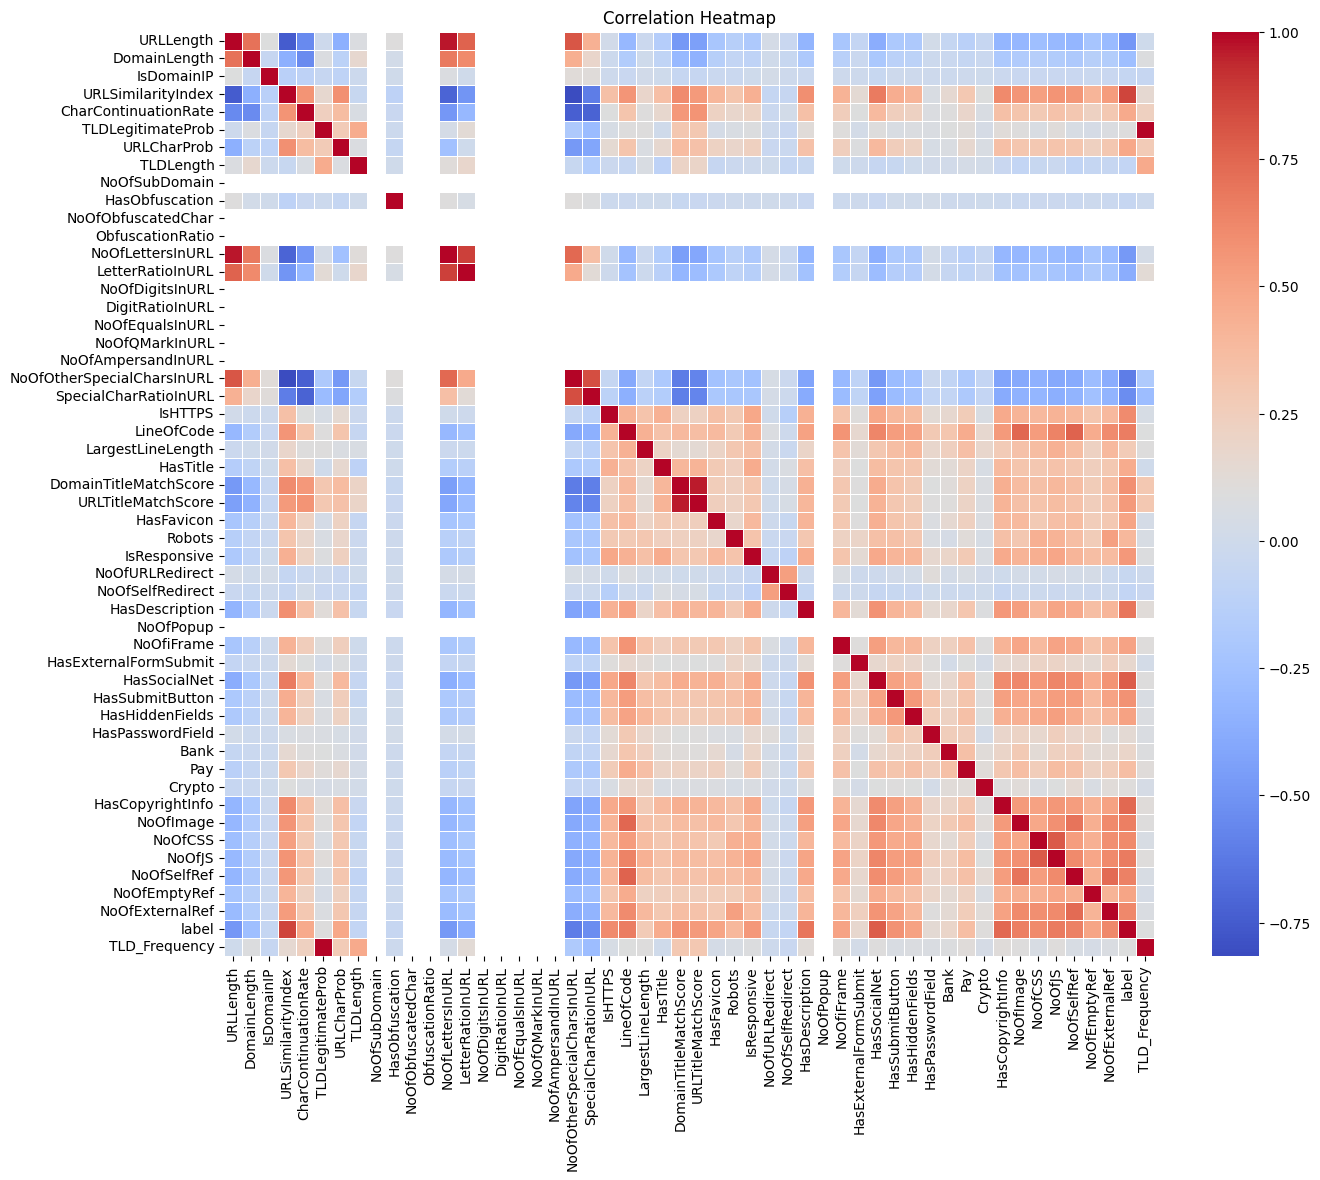

In [22]:
correlation_matrix = url_without_outliers.select_dtypes(exclude="object").corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<span style="font-size:20px">The outlier capping is affecting the correlation very much. So we will keep outliers in our data instead of capping them.</span>

# Data Type Casting

<span style="font-size:20px">We will downcast all numeric features to int32 from int64 as it will reduced memory usage and speed up processing. Some numeric columns only have values 0 and 1, therefore we will downcast them to int8.<span>

In [23]:
url[[col for col in num_feats if url[col].dtype == "int64"]] = url[
    [col for col in num_feats if url[col].dtype == "int64"]
].astype("int32")
url[bool_feats] = url[bool_feats].astype("int8")
url.dtypes

URLLength                       int32
DomainLength                    int32
IsDomainIP                       int8
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int32
NoOfSubDomain                   int32
HasObfuscation                   int8
NoOfObfuscatedChar              int32
ObfuscationRatio              float64
NoOfLettersInURL                int32
LetterRatioInURL              float64
NoOfDigitsInURL                 int32
DigitRatioInURL               float64
NoOfEqualsInURL                 int32
NoOfQMarkInURL                  int32
NoOfAmpersandInURL              int32
NoOfOtherSpecialCharsInURL      int32
SpecialCharRatioInURL         float64
IsHTTPS                          int8
LineOfCode                      int32
LargestLineLength               int32
HasTitle                         int8
DomainTitleM

<hr>

# EDA

## Distribution of Legitimate vs. Phishing URLs


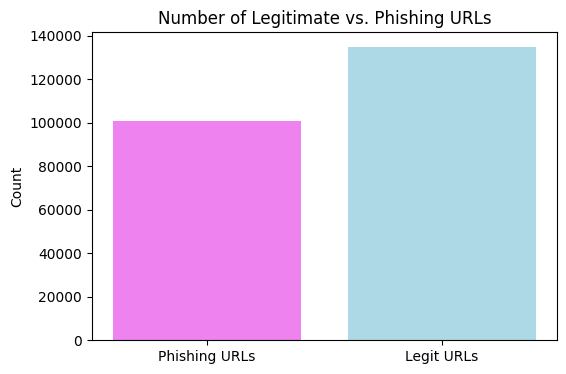

In [24]:
label_counts = url["label"].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=['lightblue', 'violet'])
plt.xticks([1, 0], ["Legit URLs", "Phishing URLs"])
plt.ylabel("Count")
plt.title("Number of Legitimate vs. Phishing URLs")
plt.show()

In [25]:
len(url[url["label"] == 1]) / len(url[url["label"] == 0])

1.3358759720639952

<span style="font-size:20px">The label distribution is slightly imbalanced, but not enough to significantly affect the model's performance. The ratio of legit to phishing URLs is approximately 1.34, which indicates only a minor imbalance.</span>

## Metadata features analysis

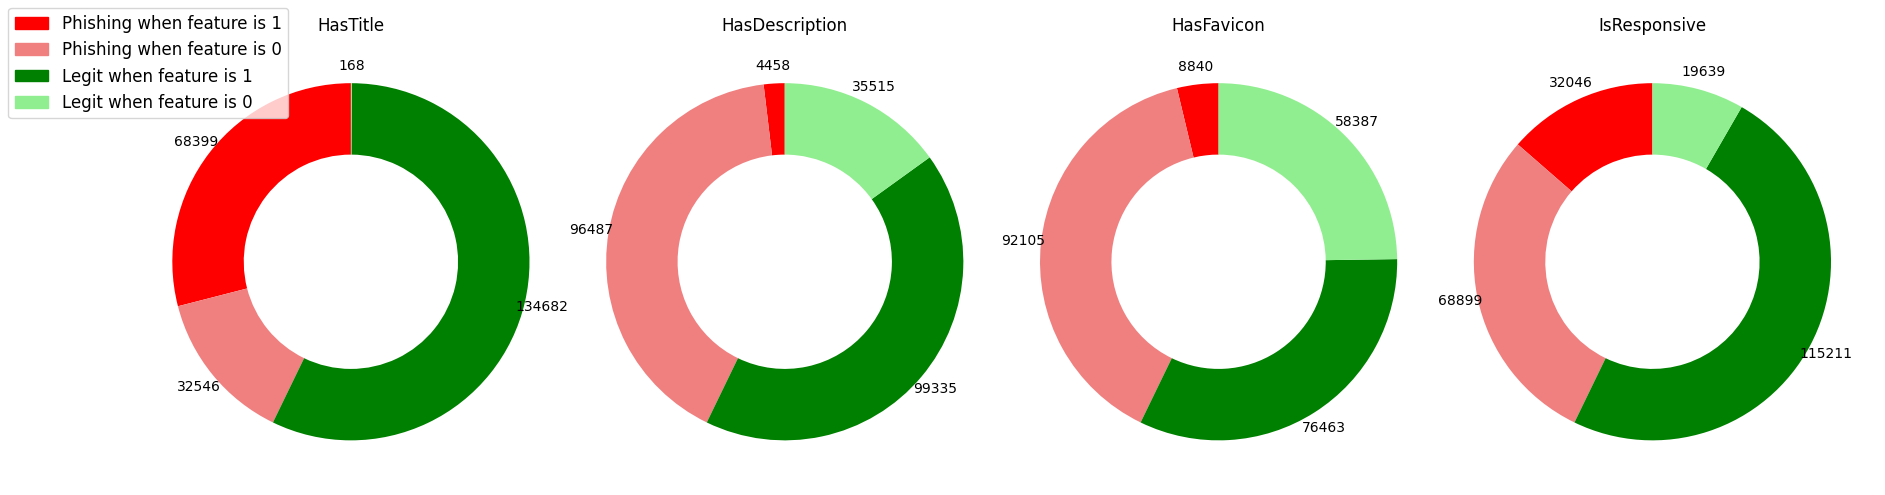

In [26]:
features = ["HasTitle", "HasDescription", "HasFavicon", "IsResponsive"]
labels_map = {0: "Phishing", 1: "Legitimate"}
colors = ['red', 'lightcoral', 'green', 'lightgreen'] 

fig, axes = plt.subplots(1, len(features), figsize=(20, 5))

for i, feature in enumerate(features):
    total_0 = url[url["label"] == 0].shape[0]
    total_1 = url[url["label"] == 1].shape[0]
    
    count_0_1 = url[(url["label"] == 0) & (url[feature] == 1)].shape[0]
    count_1_1 = url[(url["label"] == 1) & (url[feature] == 1)].shape[0]
    
    count_0_0 = total_0 - count_0_1
    count_1_0 = total_1 - count_1_1
    
    data = [count_0_1, count_0_0, count_1_1, count_1_0]
    labels = ['Phishing: 1', 'Phishing: 0', 'Legit: 1', 'Legit: 0']
    
    wedges, texts, autotexts = axes[i].pie(
        data, colors=colors, startangle=90,
        autopct='', wedgeprops=dict(width=0.4)
    )

    for j, (count, text) in enumerate(zip(data, texts)):
        x, y = text.get_position()
        axes[i].annotate(
            str(count), (x, y), ha="center", va="center", fontsize=10, color='black'
        )

    axes[i].set_title(feature, fontsize=12)

legend_handles = [
    mpatches.Patch(color='red', label='Phishing when feature is 1'),
    mpatches.Patch(color='lightcoral', label='Phishing when feature is 0'),
    mpatches.Patch(color='green', label='Legit when feature is 1'),
    mpatches.Patch(color='lightgreen', label='Legit when feature is 0')
]

fig.legend(handles=legend_handles, loc="upper left", fontsize=12)
plt.subplots_adjust(top=0.2)
plt.tight_layout()
plt.show()


<span style="font-size:20px">
<b>HasTitle</b> - Almost all legit URLs have Titles whereas 2/3 rd of phishing URLs have Titles so  it is not a strong indicator of phishing behavior on its own.<br>
<b>HasDescription</b> - Majority of legit URLs have description while majority of phishing URLs dont have description. Therefore absence of description is a strong indicator for phishing.<br>
<b>HasFavicon</b> - Though majority phishing URLs dont have favicon, but the presence of favicon in legit URLs is nearly split in half. So this is not a discriminator alone.<br>
<b>IsResponsive</b> - Majority legit URLs are responsive while many phishing URLs are not responsive but significant portion of phishing URLs are responsive. Therefore this is moderately useful feature as phishing URLs are more likely to be not responsive but not exclusively.
</span>

## Behavioral Patterns in URL Composition 

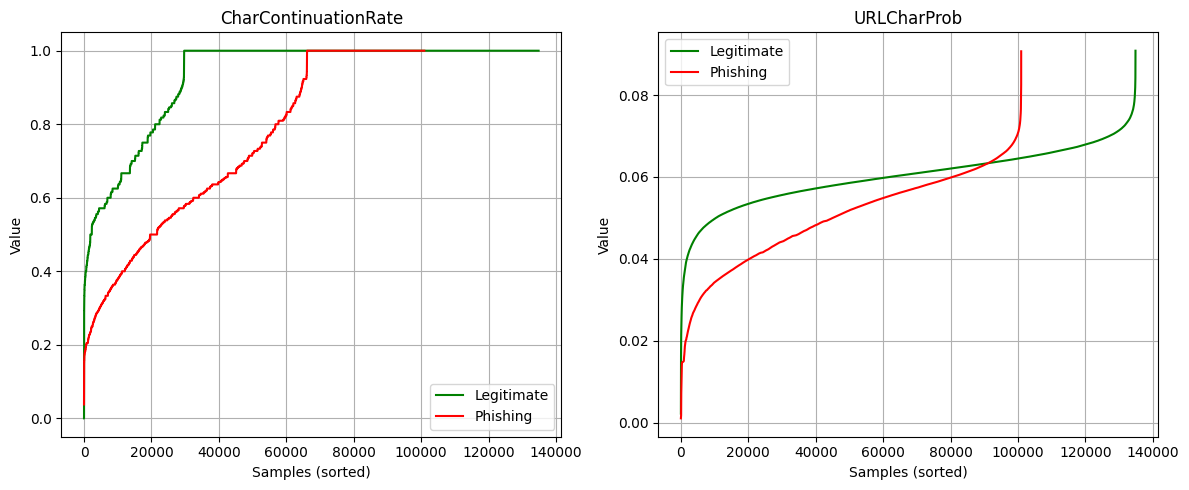

In [27]:
features = ["CharContinuationRate", "URLCharProb"]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    
    for label, color, name in zip([1, 0], ['green', 'red'], ['Legitimate', 'Phishing']):
        data = url[url["label"] == label][feature]
        sorted_data = np.sort(data)
        plt.plot(sorted_data, label=name, color=color)
    
    plt.title(f"{feature}", fontsize=12)
    plt.xlabel("Samples (sorted)", fontsize=10)
    plt.ylabel("Value", fontsize=10)
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

<span style="font-size:20px">A high <b>CharContinuationRate</b> is strongly associated with legitimate URLs, making this a useful feature for distinguishing phishing from legitimate links.<br>
Higher character probability is a clear trait of legitimate URLs, while phishing URLs often use rare or suspicious character patterns. Thus, this is also a valuable discriminating feature.
</span>

## IP Domains Analysis

In [28]:
len(url[url["IsDomainIP"] == 1])

638

<span style="font-size:20px">So we have 638 URLs which has domain as IP address. Lets check the legit versus phishing ratio.</span>

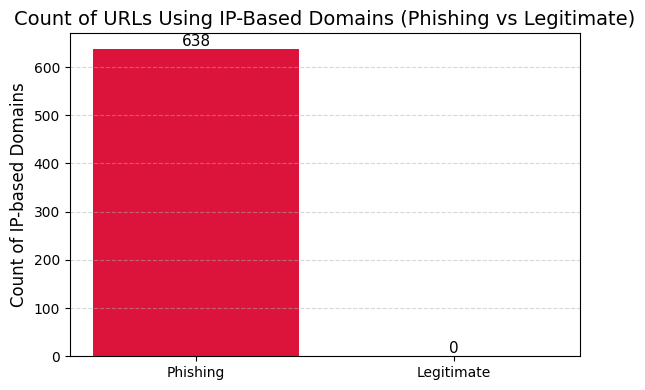

In [29]:
counts = [
    len(url[(url["label"] == 0) & (url["IsDomainIP"] == 1)]), 
    len(url[(url["label"] == 1) & (url["IsDomainIP"] == 1)])   
]

labels = ["Phishing", "Legitimate"]
colors = ['crimson', 'seagreen']

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=colors)

# Annotate count on each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 0),  # Offset text slightly above bar
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=11)

plt.ylabel("Count of IP-based Domains", fontsize=12)
plt.title("Count of URLs Using IP-Based Domains (Phishing vs Legitimate)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [30]:
ip_urls = url[url["IsDomainIP"] == 1].copy()
ip_urls["TLD"].unique()

array(['123', '94', '128', '103', '130', 'net', '160', '197', '232',
       '171', '181', '108', '111', '125', '234', '238', '214', '26',
       '146', '33', '120', '86', '41', '78', '69', '30', '117', '67',
       'com', '148', '158', '95', '163', '220', '154', '100', '145',
       '223', '24', '134', '240:8087', '13', '116', '80:8085', '177',
       '149', '230', '162', '39', '199', '182', '206', '87', '221', '12',
       '51', '242', '150', '38', '184', '167', '237', '20', '155', '225',
       '140', '185', '216', '227', '52', '68:8080', '121', '101', '189',
       '47', '243', '196', '107', '203', '211', '252', '21', '231', '222',
       '28', '187', '173', '178', '250', '84', '188:10003', '211:8383',
       '233', '126:8080', '106', '136', '161', '126', '15', '240', '198',
       '165', '249:8080', '11', '235', '133:8080', '210', '27', '200',
       '42', '43', '80', '71', '110', '254:30332', '63', '166', '14',
       '151', '46'], dtype=object)

<span style="font-size:20px">Presence of an IP-based domain is an extremely strong indicator of phishing.
This feature can act as a near binary discriminator.
Also the TLD of these URLs is the last octet of IP address, which is not actually a valid TLD signifying the absence of TLD in IP-based URLs.</span>

## Redirect Behavior

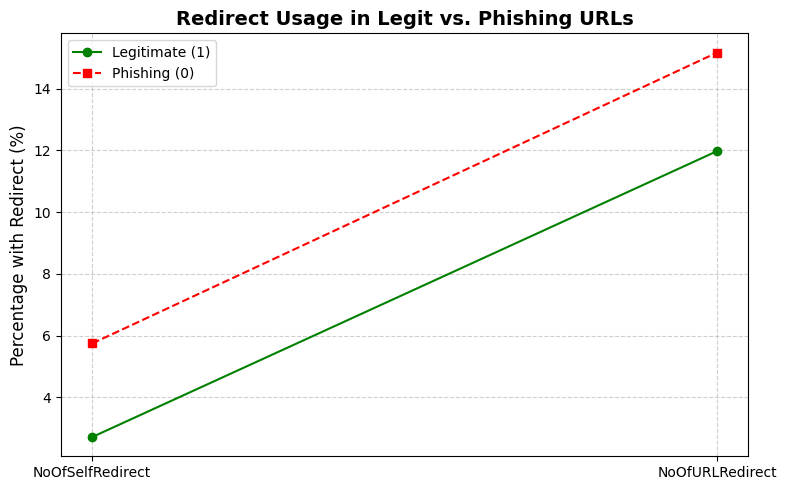

In [31]:
features = ["NoOfSelfRedirect", "NoOfURLRedirect"]

percent_legit = [url[url["label"] == 1][f].mean() * 100 for f in features]
percent_phish = [url[url["label"] == 0][f].mean() * 100 for f in features]

x = np.arange(len(features))

plt.figure(figsize=(8, 5))
plt.plot(x, percent_legit, marker='o', linestyle='-', color='green', label='Legitimate (1)')
plt.plot(x, percent_phish, marker='s', linestyle='--', color='red', label='Phishing (0)')

plt.xticks(x, features)
plt.ylabel("Percentage with Redirect (%)", fontsize=12)
plt.title("Redirect Usage in Legit vs. Phishing URLs", fontsize=14, weight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<span style="font-size:20px">The gap between phishing and legit increases from NoOfSelfRedirect to NoOfURLRedirect.This suggests URL redirection is more heavily exploited in phishing than self redirection.<br>Both redirect-related features show distinct class separation, meaning they could be useful in classification.</span>

##  HTML Script-Based Feature Analysis with Respect to URL Classification

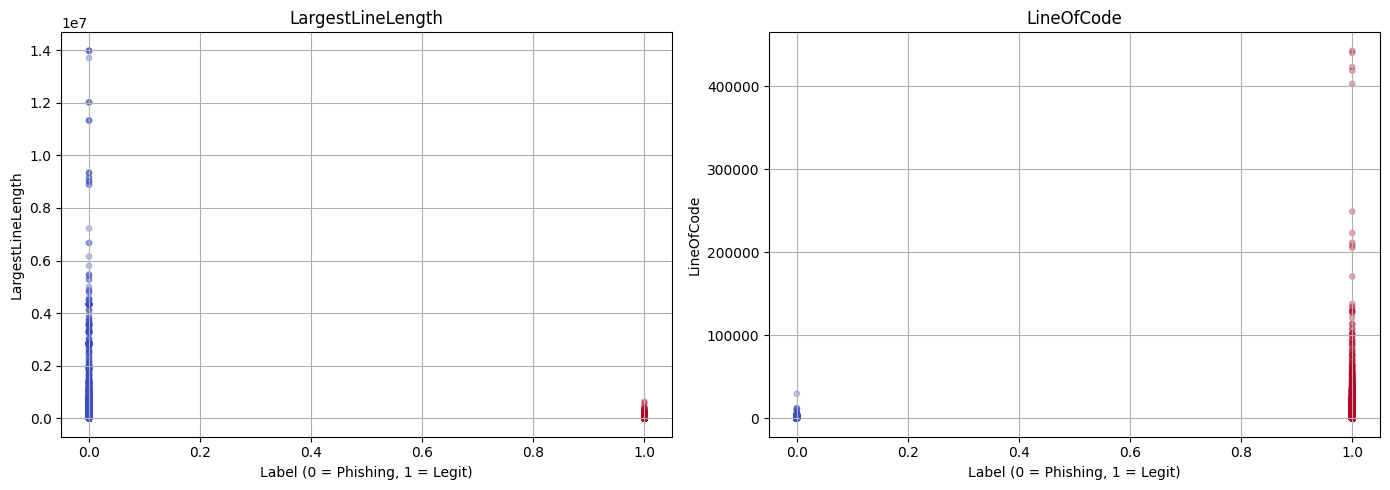

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(url['label'], url['LargestLineLength'], alpha=0.3, s=15, c=url['label'], cmap='coolwarm')
axes[0].set_xlabel('Label (0 = Phishing, 1 = Legit)')
axes[0].set_ylabel('LargestLineLength')
axes[0].set_title('LargestLineLength')
axes[0].grid(True)

axes[1].scatter(url['label'], url['LineOfCode'], alpha=0.3, s=15, c=url['label'], cmap='coolwarm')
axes[1].set_xlabel('Label (0 = Phishing, 1 = Legit)')
axes[1].set_ylabel('LineOfCode')
axes[1].set_title('LineOfCode')
axes[1].grid(True)

plt.tight_layout()
plt.show()

<span style="font-size:20px">Legit sites tend to avoid long single lines, while phishing pages sometimes jam content into one very long line. This feature is very useful.<br> Phishing pages are often minimal — just enough HTML/JS to fake a login page. Legit sites, by contrast, tend to have lots of content, features, and assets reflected in high LOC counts. This feature is also very informative.</span>

##  Length-Based URL Analysis

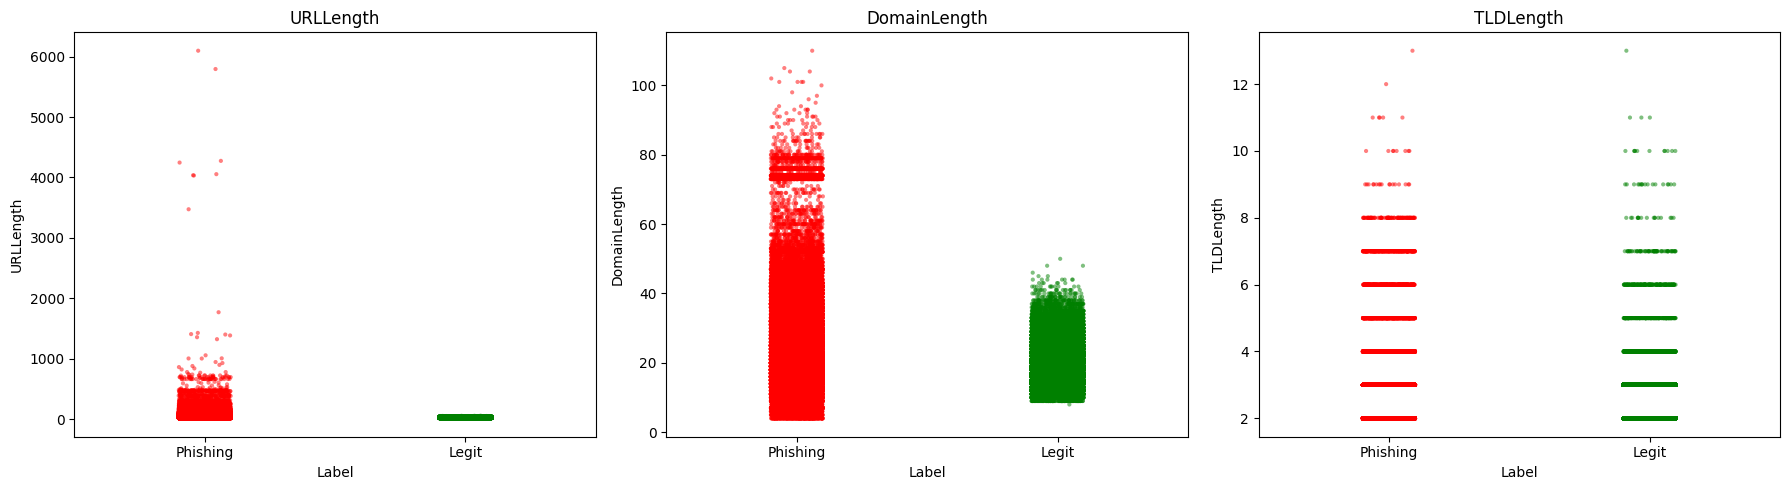

In [33]:
features = ["URLLength", "DomainLength", "TLDLength"]

fig, axes = plt.subplots(1, len(features), figsize=(18, 5))

for i, feature in enumerate(features):
    sns.stripplot(data=url, x='label', y=feature, palette={'0': 'red', '1': 'green'}, ax=axes[i], alpha=0.5, size=3)
    axes[i].set_xticklabels(['Phishing', 'Legit'])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

<span style="font-size:20px">URLLength is a highly discriminative feature, as phishing URLs tend to be significantly longer than legitimate ones, often with extreme outliers, making it a strong candidate to retain. DomainLength also shows a useful pattern, with phishing domains generally being longer and more variable compared to the more concise and consistent lengths of legitimate domains, so this too should be kept. In contrast, TLDLength does not display much difference between phishing and legitimate URLs, as both use a similar range of TLD lengths, suggesting it may not be very informative on its own. </spam>
<hr>

## Title Match Score Analysis

<span style="font-size:20px">Analyzing title match scores by plotting their average values across binned intervals, separately for Legitimate and Phishing URLs. Using line plots, we know how these scores vary for both classes. The green curve represented Legit URLs and the red curve represented Phishing URLs, will help us observe patterns in how closely titles match either the full URL or the domain portion.</span>

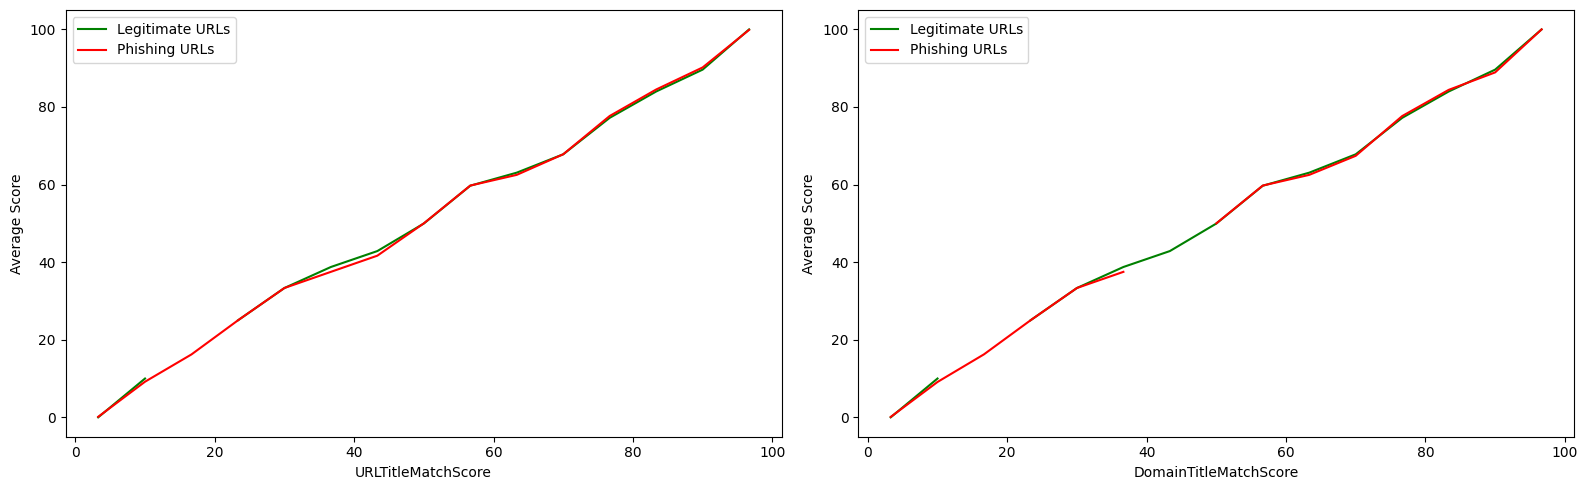

In [34]:
features = ["URLTitleMatchScore", "DomainTitleMatchScore"]

plt.figure(figsize=(16, 5))  
for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    
    for label, color, name in zip([1, 0], ['green', 'red'], ['Legitimate', 'Phishing']):
        label_data = url[url["label"] == label][feature]
        bins = pd.cut(label_data, bins=15)
        
        grouped = label_data.groupby(bins).mean()
        bin_mids = [interval.mid for interval in grouped.index]

        plt.plot(bin_mids, grouped.values, label=f"{name} URLs", color=color)
    
    plt.xlabel(feature)
    plt.ylabel("Average Score")
    plt.legend()

plt.tight_layout()
plt.show()


<span style="font-size:20px">It is observed that both Legit and Phishing URLs tend to follow a similar increasing trend with higher match scores, indicating that phishing sites often attempt to mimic legitimate naming patterns. However, Legitimate URLs generally showed slightly higher average scores in the mid-range bins. However, because the curves are closely aligned with minimal separation between the two classes, these features alone do not provide strong discriminatory power. Therefore, they cannot be considered reliable individual parameters for classification.</span>

## Analysis of URL Structural Features

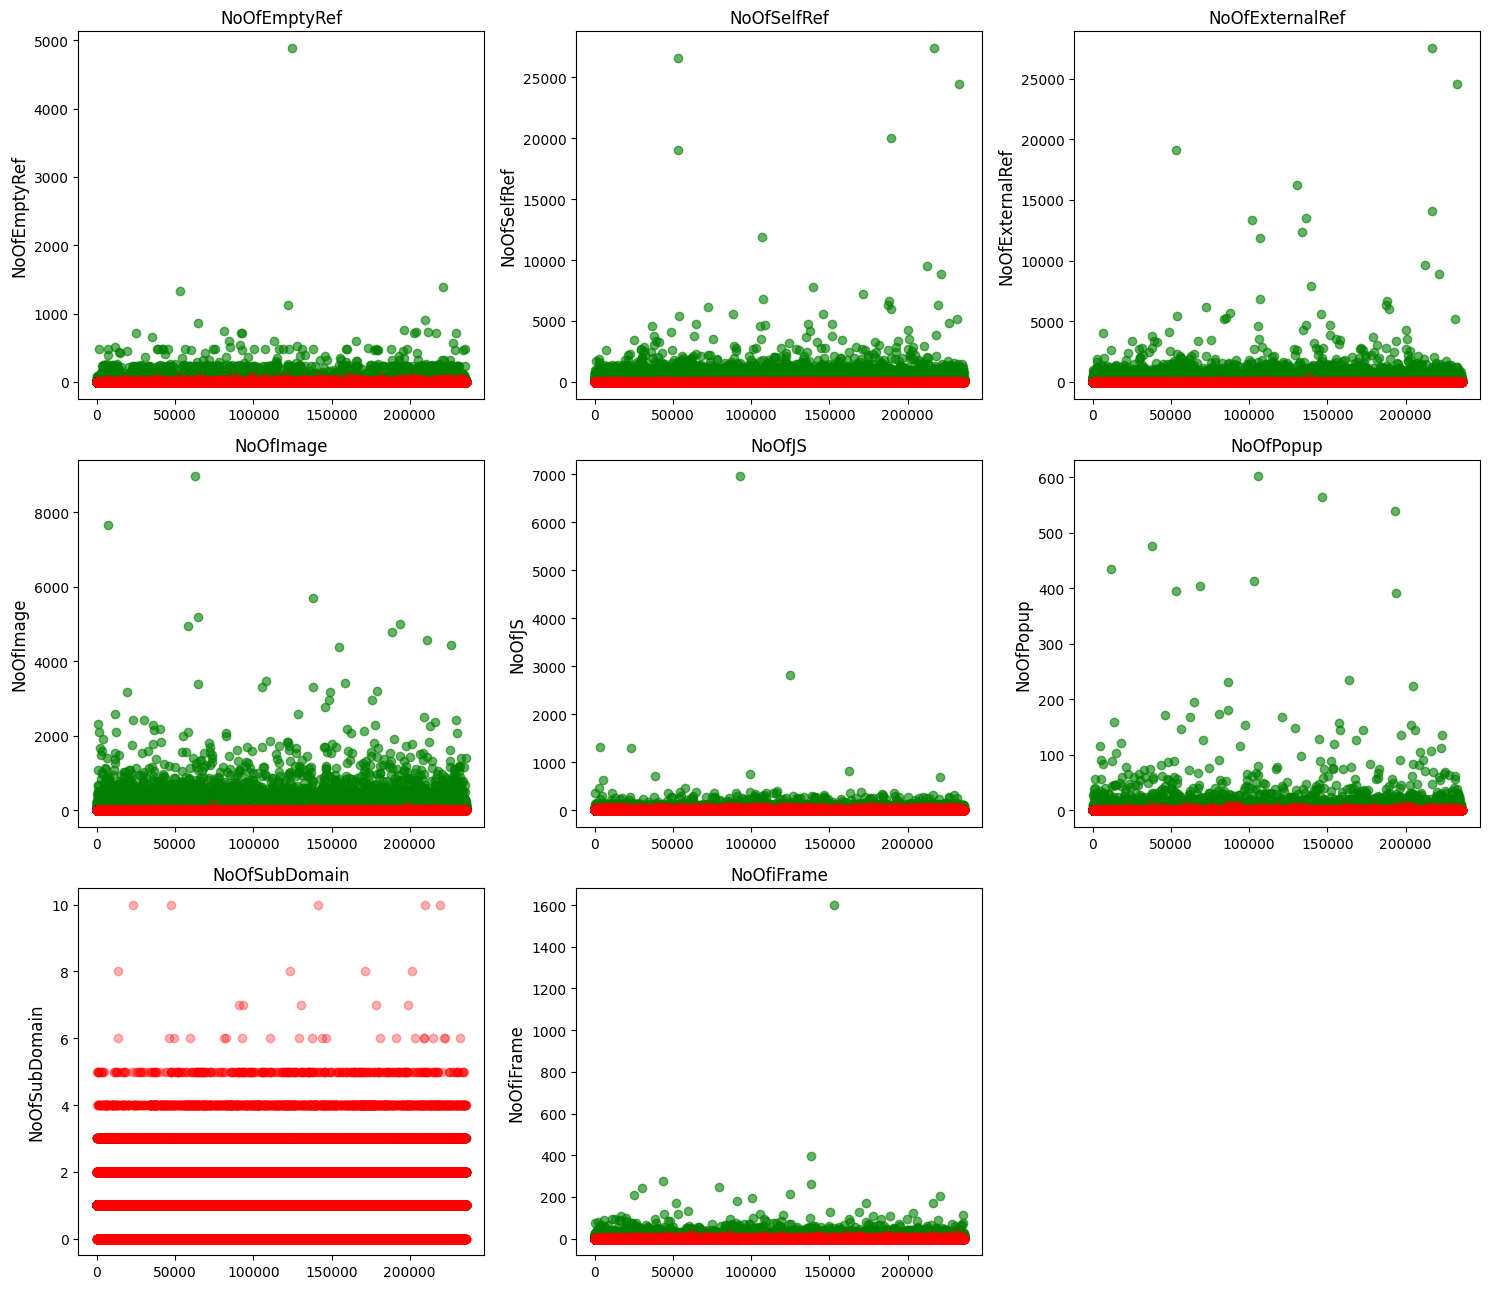

In [35]:
features = ["NoOfEmptyRef", "NoOfSelfRef", "NoOfExternalRef", "NoOfImage", 
            "NoOfJS", "NoOfPopup", "NoOfSubDomain", "NoOfiFrame"]
plots_per_row = 3

fig, axes = plt.subplots(nrows=(len(features) // plots_per_row) + (1 if len(features) % plots_per_row else 0),
                         ncols=plots_per_row, figsize=(15, len(features) * 5 // plots_per_row))
axes = axes.flatten()  

for i, feature in enumerate(features):
    ax = axes[i]
    
    legit_data = url[url["label"] == 1]
    ax.scatter(legit_data.index, legit_data[feature], color='green', alpha=0.6, label="Legitimate URLs")
  
    phish_data = url[url["label"] == 0]
    ax.scatter(phish_data.index, phish_data[feature], color='red', alpha=0.3, label="Phishing URLs")

    ax.set_title(f"{feature}", fontsize=12)
    ax.set_ylabel(f"{feature}", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()


In [36]:
url[url["label"] == 1]["NoOfSubDomain"].unique()

array([1, 2, 3, 4], dtype=int32)

In [37]:
for i in features:
    print(f"{i} : {url[url["label"] == 0][i].max()}")

NoOfEmptyRef : 91
NoOfSelfRef : 120
NoOfExternalRef : 368
NoOfImage : 158
NoOfJS : 102
NoOfPopup : 10
NoOfSubDomain : 10
NoOfiFrame : 25


<span style="font-size:20px">NoOfEmptyRef, NoOfSelfRef, NoOfExternalRef, NoOfImage, NoOfJS, and NoOfPopup show some clear separation, with phishing instances often having fewer occurrences or unusual values, while legitimate pages show more diverse and higher counts. NoOfSubDomain is a particularly good discriminator, as phishing sites tend to use more subdomains to mimic legitimate sites. NoOfIframe also shows some differences, with phishing sites using iframes in less consistent or manipulative ways.<br><br>However, all these features except sub-domain are DOM-based, meaning they require fully rendering the webpage and parsing its HTML structure;an approach that, while insightful, is computationally expensive and not ideal for real-time applications. This complexity makes them harder to extract at scale, especially in environments where quick detection and minimal resource usage are critical.</span>

## URL Characteristic Ratios Analysis

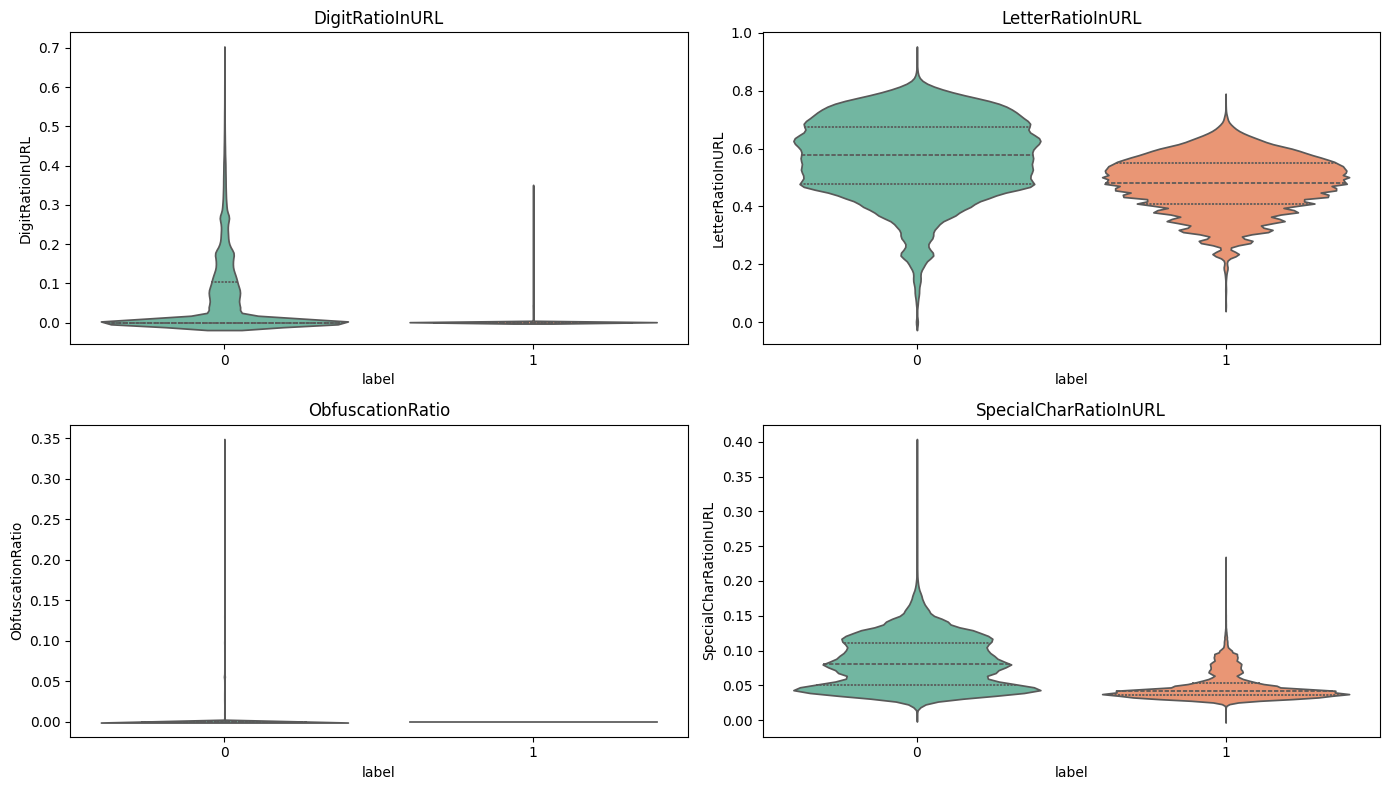

In [38]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(["DigitRatioInURL", "LetterRatioInURL", "ObfuscationRatio", "SpecialCharRatioInURL"]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=url, x="label", y=col, palette="Set2", inner="quartile")
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

<span style="font-size:20px">Phishing URLs tend to have a lower letter ratio and a slightly higher concentration of digits and special characters, indicating a strategy to obfuscate the URL and trick users. The ObfuscationRatio is especially skewed, suggesting it's more common in phishing samples. These features are relatively lightweight and can be extracted directly from the URL string without rendering or heavy computation, making them highly suitable for real-time phishing detection systems.</span>

## Legitimate URL Security & Content Features Analysis

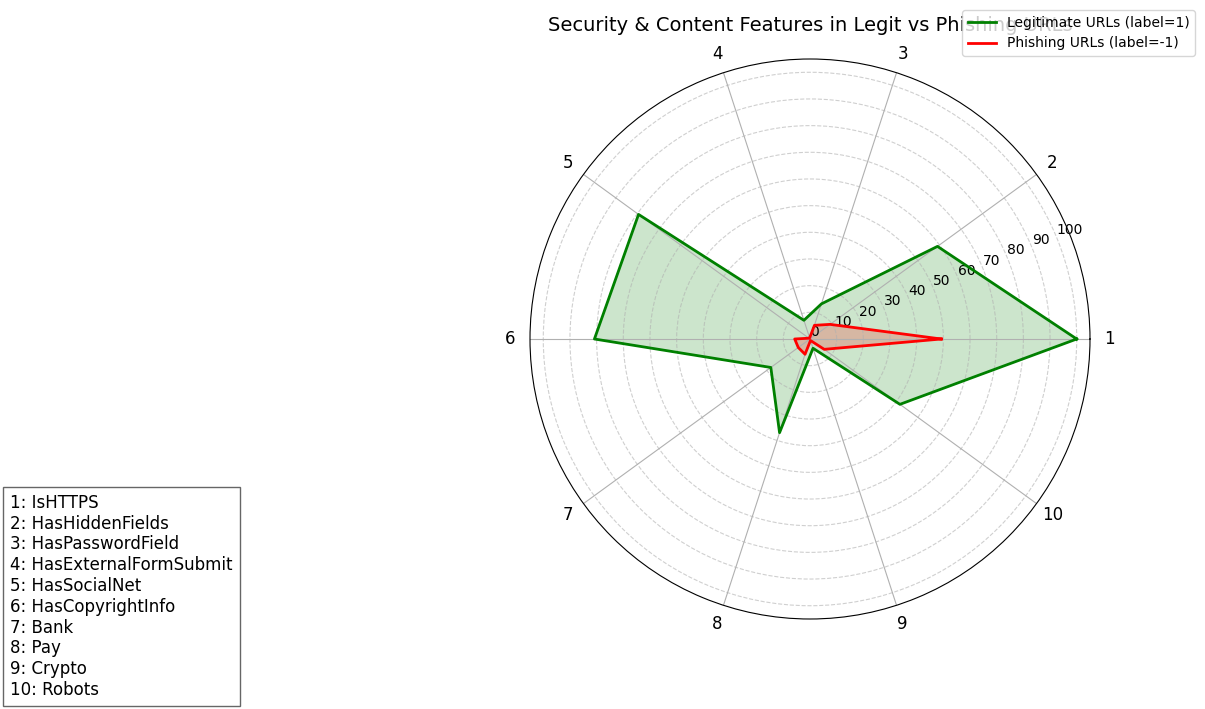

In [39]:
legit_urls = url[url["label"] == 1]
phish_urls = url[url["label"] == 0]

metrics_legit = {
    "IsHTTPS": legit_urls["IsHTTPS"].mean() * 100,
    "HasHiddenFields": legit_urls["HasHiddenFields"].mean() * 100,
    "HasPasswordField": legit_urls["HasPasswordField"].mean() * 100,
    "HasExternalFormSubmit": legit_urls["HasExternalFormSubmit"].mean() * 100,
    "HasSocialNet": legit_urls["HasSocialNet"].mean() * 100,
    "HasCopyrightInfo": legit_urls["HasCopyrightInfo"].mean() * 100,
    "Bank": legit_urls["Bank"].mean() * 100,
    "Pay": legit_urls["Pay"].mean() * 100,
    "Crypto": legit_urls["Crypto"].mean() * 100,
    "Robots": legit_urls["Robots"].mean() * 100
}

metrics_phish = {
    "IsHTTPS": phish_urls["IsHTTPS"].mean() * 100,
    "HasHiddenFields": phish_urls["HasHiddenFields"].mean() * 100,
    "HasPasswordField": phish_urls["HasPasswordField"].mean() * 100,
    "HasExternalFormSubmit": phish_urls["HasExternalFormSubmit"].mean() * 100,
    "HasSocialNet": phish_urls["HasSocialNet"].mean() * 100,
    "HasCopyrightInfo": phish_urls["HasCopyrightInfo"].mean() * 100,
    "Bank": phish_urls["Bank"].mean() * 100,
    "Pay": phish_urls["Pay"].mean() * 100,
    "Crypto": phish_urls["Crypto"].mean() * 100,
    "Robots": phish_urls["Robots"].mean() * 100
}

feature_mapping = {i+1: feature for i, feature in enumerate(metrics_legit.keys())}
categories = list(feature_mapping.keys()) 
labels = list(metrics_legit.keys())

values_legit = list(metrics_legit.values())
values_phish = list(metrics_phish.values())
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values_legit += values_legit[:1]
values_phish += values_phish[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values_legit, linewidth=2, linestyle='solid', color="green", label="Legitimate URLs (label=1)")
ax.fill(angles, values_legit, alpha=0.2, color="green")
ax.plot(angles, values_phish, linewidth=2, linestyle='solid', color="red", label="Phishing URLs (label=-1)")
ax.fill(angles, values_phish, alpha=0.2, color="red")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels([str(i) for i in range(0, 101, 10)], fontsize=10)
ax.yaxis.grid(True, linestyle="--", alpha=0.6)

# Title and legend
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.title("Security & Content Features in Legit vs Phishing URLs", fontsize=14, pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
legend_text = "\n".join([f"{k}: {v}" for k, v in feature_mapping.items()])
plt.figtext(0.1, 0.05, legend_text, fontsize=12, va="bottom", ha="left",
            bbox={"facecolor": "white", "alpha": 0.6, "pad": 5})
plt.show()

<span style="font-size:20px">1. All legit sites use HTTPS. If a site lacks HTTPS, it’s a strong phishing signal. But 50% of phishing sites now use HTTPS to look legit, so this feature alone isn’t enough but still a strong indicator.<br>2. Legit sites use hidden fields more often. Phishing sites don’t often include them, possibly because they’re hastily coded. This may seem counterintuitive but it's a helpful flag.<br>3.Very low in both. This means phishing detection probably needs more context than just whether there’s a password field. It’s a weak indicator here.<br> 4. Slightly higher for legit—redirecting form submissions to external servers is common in legit website.<br>5. Legitimate websites commonly link to social media. Phishing pages rarely bother. Lack of social net links = red flag.<br>6. Huge difference. Legit pages usually have copyright info. Phishing pages skip legal polish. Missing copyright = red flag.<br>7. Phishing pages often mention banks to lure users. Legit pages generally avoid unnecessary direct references unless it’s a bank’s site.<br>8. Real payment portals use “Pay” terminology. Phishing pages don’t always replicate that wording directly.<br>9. Phishing pages might impersonate crypto services or exchanges. Use of “Crypto” terms is mildly suspicious unless the site’s expected to have them.<br>10. Legit websites usually have robots.txt. Phishing sites often don’t because they don’t care about SEO or want to avoid detection.</span>

## Character Frequency Analysis of URLs

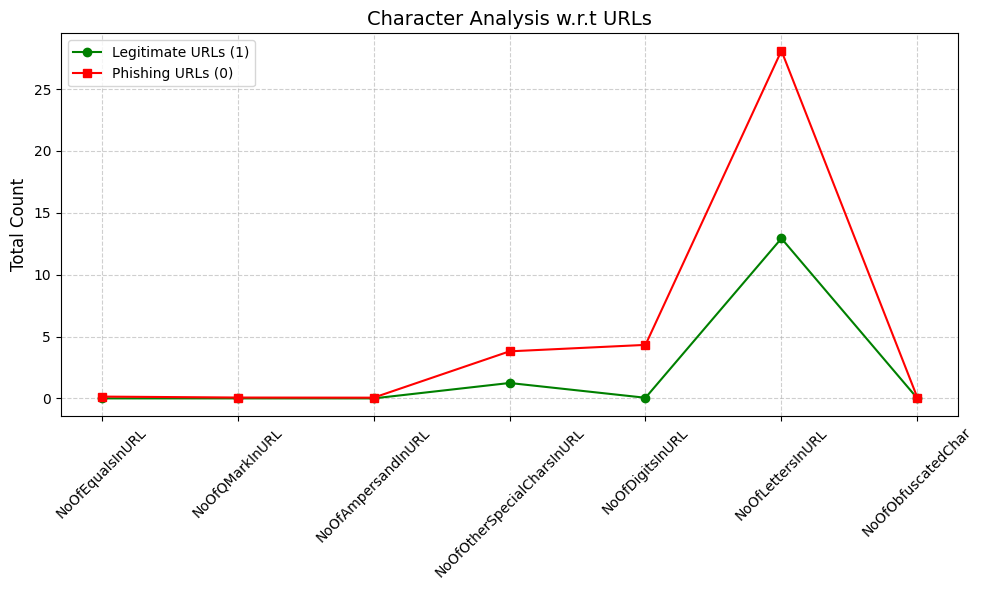

In [40]:
features = [
    "NoOfEqualsInURL", "NoOfQMarkInURL", "NoOfAmpersandInURL", "NoOfOtherSpecialCharsInURL", "NoOfDigitsInURL", "NoOfLettersInURL",
    "NoOfObfuscatedChar"
]

legit_counts = url[url["label"] == 1][features].mean() 
phish_counts = url[url["label"] == 0][features].mean()  
x = np.arange(len(features))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, legit_counts, marker='o', linestyle='-', color='green', label="Legitimate URLs (1)")
ax.plot(x, phish_counts, marker='s', linestyle='-', color='red', label="Phishing URLs (0)")
ax.set_ylabel("Total Count", fontsize=12)
ax.set_title("Character Analysis w.r.t URLs", fontsize=14)

ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, fontsize=10)  

ax.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<span style="font-size:20px">Equals, question marks, ampersands and obfuscated characters aren't a distinguishing factor here. Might not be useful alone. Phishing URLs tend to use more special characters, digits and letters, possibly for obfuscation or to trick users.</span>

## URL Similarity Index by Label

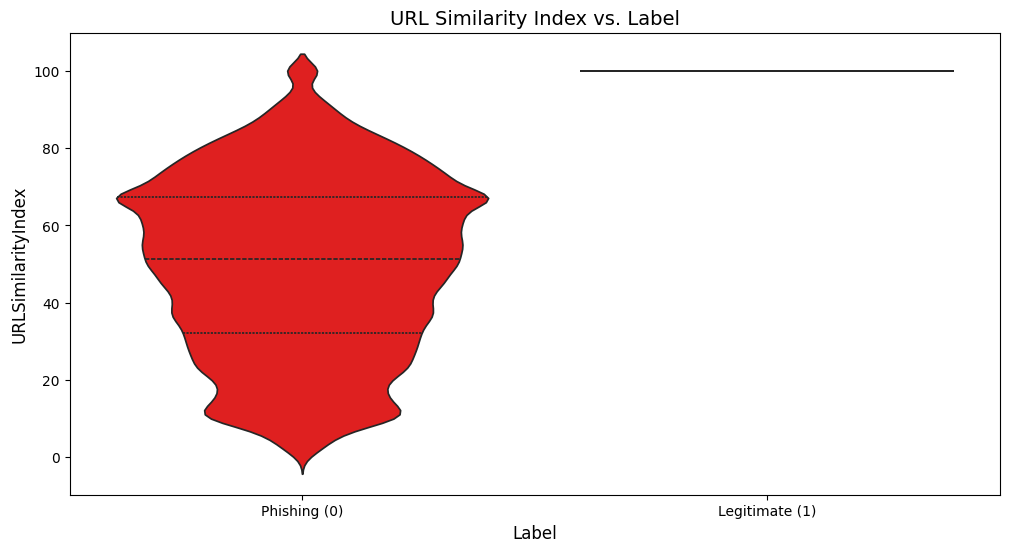

In [41]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=url["label"], y=url["URLSimilarityIndex"], palette=["red", "green"], inner="quartile")
plt.xticks([0, 1], ["Phishing (0)", "Legitimate (1)"])
plt.xlabel("Label", fontsize=12)
plt.ylabel("URLSimilarityIndex", fontsize=12)
plt.title("URL Similarity Index vs. Label", fontsize=14)
plt.show()

In [42]:
url[url["label"] == 1]["URLSimilarityIndex"].unique()

array([100.])

<span style="font-size:20px">For phishing urls, the distribution is wide, especially between 20 to 80, indicating high variability in how similar phishing URLs are to legitimate ones.Peak (mode) is around 65–70, meaning a significant number of phishing URLs have moderate similarity to legitimate ones. That makes them harder to distinguish with basic string comparison.
For legit urls, there are also phishing URLs with very low similarity scores (0–20), likely obvious fakes.<br><br>The distribution is flat and located at 100% similarity. This suggests all legitimate URLs in the dataset have perfect or near-perfect similarity to a known safe domain. </span>

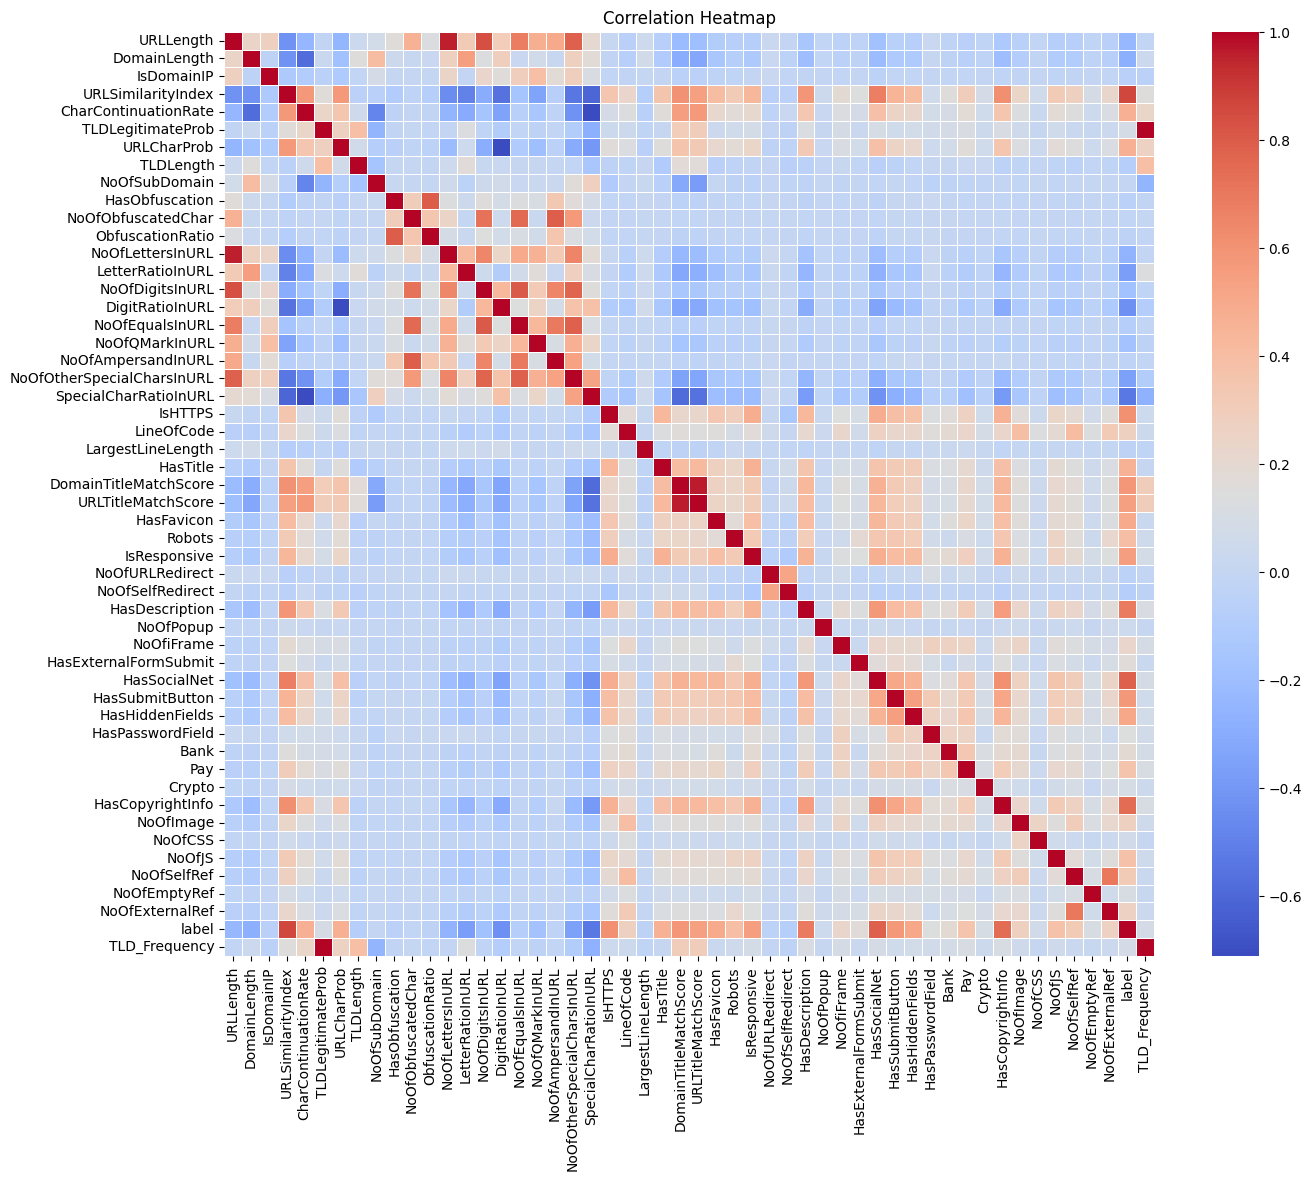

In [43]:
correlation_matrix = url.select_dtypes(exclude="object").corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

# Feature Elimination

## Removing highly correlated features

<span style="font-size:20px">I have taken 0.7 as the threshold because 0.7 is commonly used rule of thumb in data science.<br>I am iterating 4 times so to remove nested correlated features i.e. other highly correlated pairs may arise after previous iteration which were indirectly correlated.</span>

In [44]:
url = url.select_dtypes(exclude="object")

threshold = 0.7    
print("Removed features:")

for _ in range(4): 
    correlation_matrix = url.corr().abs()
    correlated_features = set()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] > threshold:
                colname = correlation_matrix.columns[i]
                if colname != 'label' and colname in url.columns:
                    correlated_features.add(colname)

    if not correlated_features:
        break

    for col in correlated_features:
        print(col)

    url = url.drop(columns=correlated_features)

Removed features:
ObfuscationRatio
NoOfEqualsInURL
NoOfAmpersandInURL
SpecialCharRatioInURL
NoOfDigitsInURL
DigitRatioInURL
NoOfOtherSpecialCharsInURL
TLD_Frequency
NoOfLettersInURL
URLTitleMatchScore
NoOfExternalRef


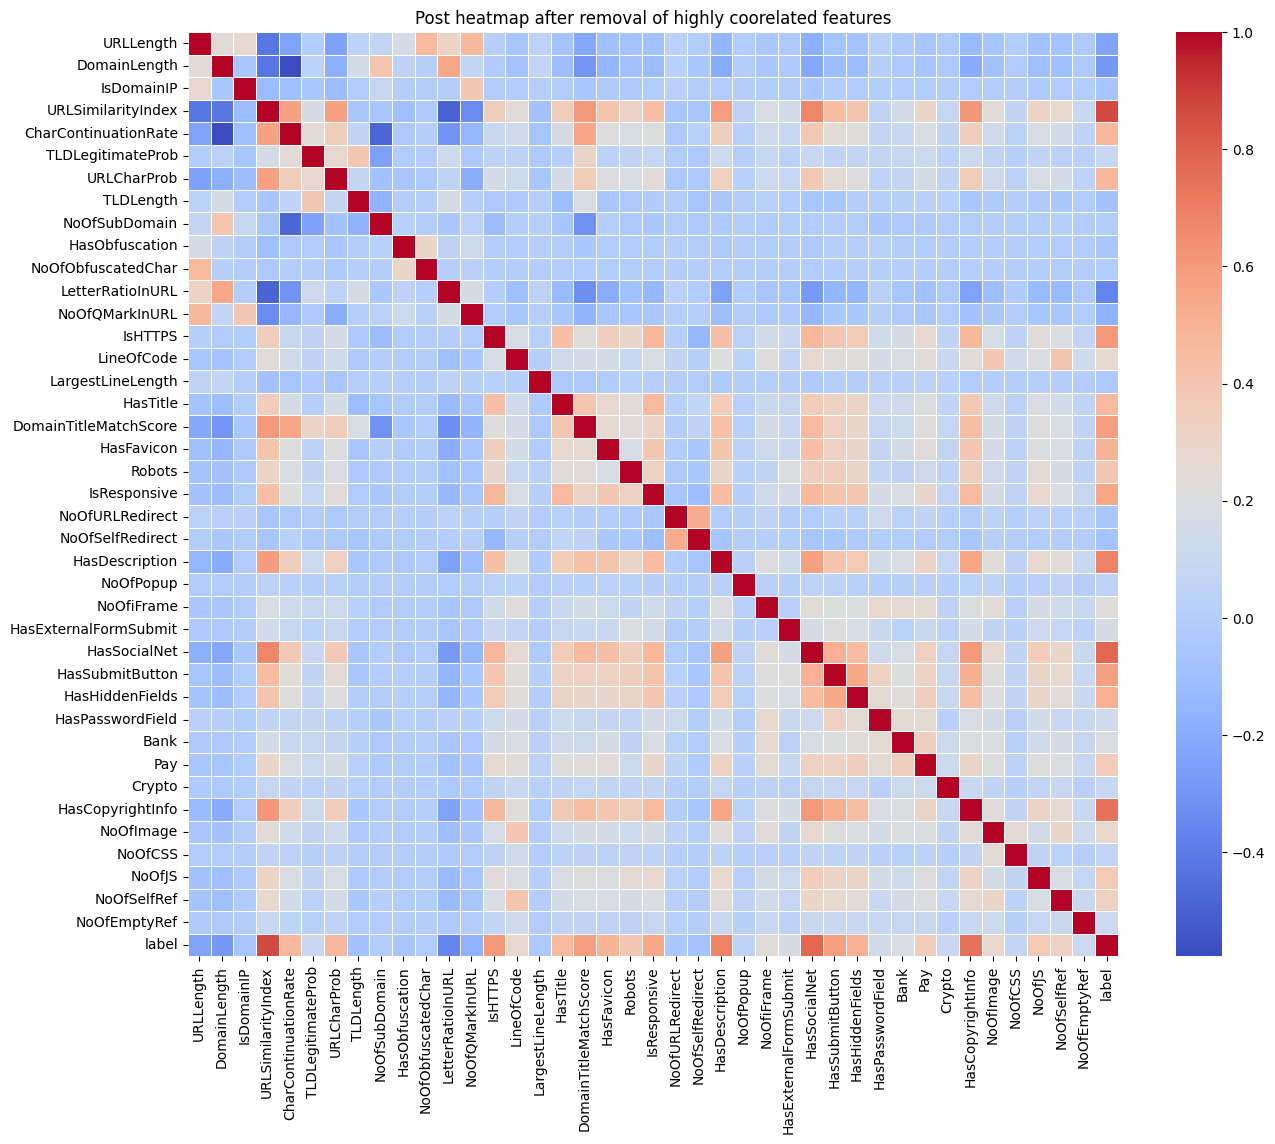

In [45]:
correlation_matrix = url.select_dtypes(exclude="object").corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Post heatmap after removal of highly coorelated features")
plt.show()

<span style="font-size:20px">This step is important because in the pair of highly correlated features, the info provided by both is mostly same so the features are redunctant.</span>

<hr>

## Removing Features with low variance 
<span style="font-size:20px">A low-variance feature is one that doesn't vary much across the dataset, it’s almost constant.<br>It’s not helpful in distinguishing between classes.</span>

In [46]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(url)
all_columns = url.columns
keep_mask = selector.get_support()
removed_columns = all_columns[~keep_mask]
url = url.drop(columns=removed_columns)

print("Dropped Features:")
list(removed_columns)

Dropped Features:


['IsDomainIP', 'URLCharProb', 'HasObfuscation']

<span style="font-size:20px">Why I used this - <br>1.  They Add No Predictive Power<br>2.  They Introduce Noise<br>3.  They Increase Training Time<br>4. They increase dimensionality</span>

## Removing features based on EDA insights

In [47]:
features_to_be_removed = ["HasTitle", "TLDLength", "NoOfObfuscatedChar", "NoOfQMarkInURL", "HasPasswordField",
                         "HasExternalFormSubmit", "Crypto", "LargestLineLength", "LineOfCode", "URLSimilarityIndex",
                         "DomainTitleMatchScore"]

url.drop(columns=features_to_be_removed, inplace=True)

<span style=font-size:20px>1. The features chosen for removal, such as HasTitle and TLDLength, were found to offer minimal variance or discriminative power — almost all websites have titles and the length of the top-level domain rarely adds meaningful insight compared to its type.<br>2. The NoOfObfuscatedChar and NoOfQMarkInURL feature, do not have class separation.<br>3. Features like HasPasswordField, HasExternalFormSubmit and Crypto, are used by very less phishing and legit URLs in the dataset which wiil reduce general applicability.<br>4. LargestLineLength and LineOfCode are very less correlated with target or URLSimilarityIndex.<br>5. URLSimilarityIndex is dropped because of its too highly correlation with the target, including these feature means model knows which is phishing or legit prior only, this will affect general applicability.<br>6. The legit and phishing curves of DomainTitleMatchScore are overlapping too much which can be noisy for the model.</span>

In [48]:
url.head()

,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,NoOfSubDomain,LetterRatioInURL,IsHTTPS,HasFavicon,Robots,IsResponsive,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,31,24,1.000000,0.522907,1,0.581,1,0,1,1,...,1,1,0,1,34,20,28,119,0,1
1,23,16,0.666667,0.032650,1,0.391,1,1,1,0,...,0,0,0,1,50,9,8,39,0,1
2,29,22,0.866667,0.028555,2,0.517,1,0,1,1,...,1,0,0,1,10,2,7,42,2,1
3,26,19,1.000000,0.522907,1,0.500,1,0,1,1,...,1,0,1,1,3,27,15,22,1,1
4,33,26,1.000000,0.079963,1,0.606,1,0,1,1,...,1,1,1,1,244,15,34,72,1,1


# Train Test Split

In [49]:
X = url.drop('label', axis=1) 
y = url['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set label distribution:\n{y_train.value_counts()}")
print(f"Test set label distribution:\n{y_test.value_counts()}")

Training set label distribution:
label
1    94262
0    70794
Name: count, dtype: int64
Test set label distribution:
label
1    40588
0    30151
Name: count, dtype: int64


<span style="font-size:20px">I have split the data prior to applying dimensionality reduction so that the testing set doesn't influence the extraction. This will help to prevent data leakage, which could lead to overly optimistic performance estimates.</span>

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Feature Extraction

<span style="font-size:20px">I will be using below three methods for feature extraction. Per method I will rank the features. After that I will combine the ranks of features of the three methods by averaging and perpare the final rank of the features.<br>This is because it is safe to take opinion of all methods rather than relying on one single method. This way we may achieve best features for model rather than bias features. After that we will sort out top K features</span>

## Random Forest Classifier

In [51]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled_df, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

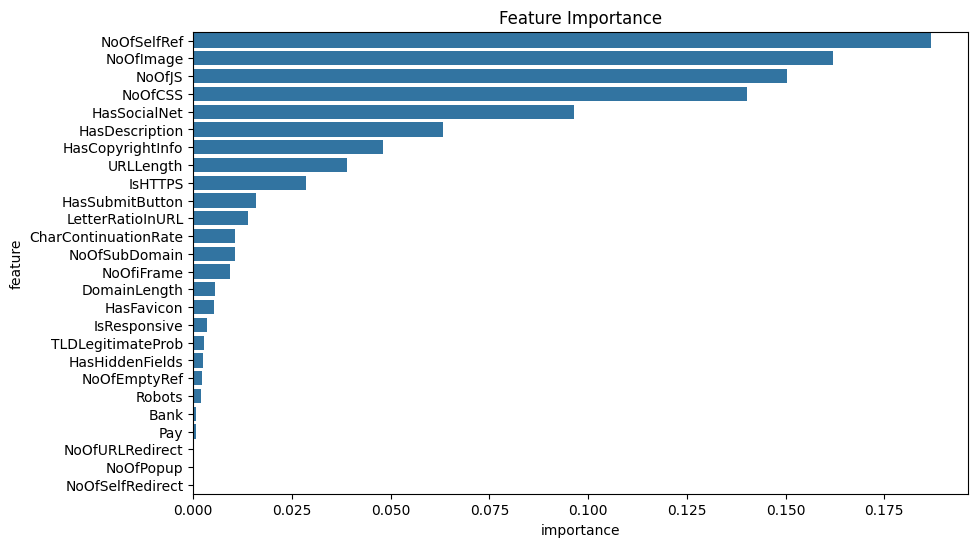

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## Permutation Importance

In [53]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

result = permutation_importance(rf, X_train_scaled, y_train, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

feature_importance_perm = pd.DataFrame({
    'feature': X_train.columns[sorted_idx],
    'importance': result.importances_mean[sorted_idx]
}).sort_values(by='importance', ascending=False)

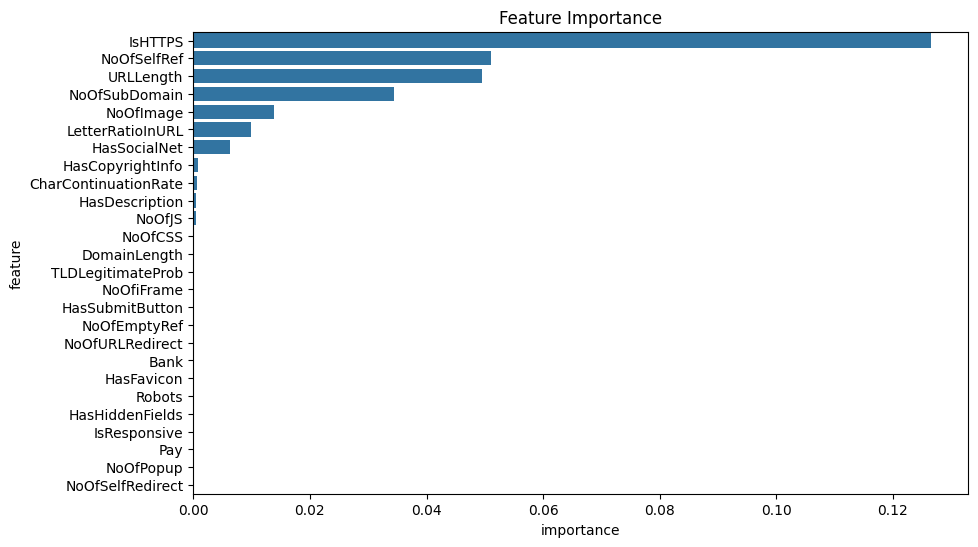

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_perm)
plt.title('Feature Importance')
plt.show()

## Extra Trees Classifier

In [55]:
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train_scaled, y_train)

importances_etc = etc.feature_importances_

feature_importance_etc = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances_etc
}).sort_values(by='importance', ascending=False)

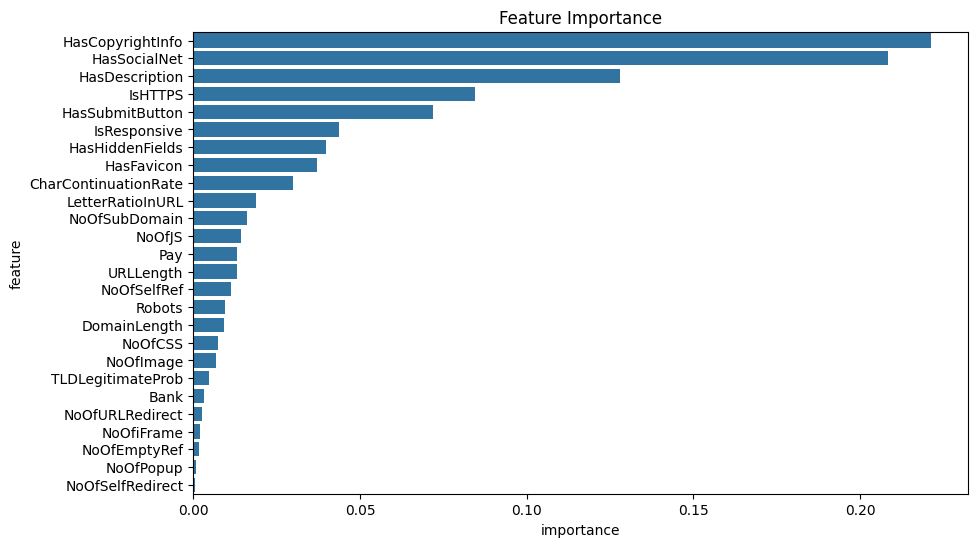

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_etc)
plt.title('Feature Importance')
plt.show()

In [57]:
feature_importance_df['rank_rf'] = feature_importance_df['importance'].rank(ascending=False)
feature_importance_etc['rank_etc'] = feature_importance_etc['importance'].rank(ascending=False)
feature_importance_perm['rank_perm'] = feature_importance_perm['importance'].rank(ascending=False)

combined = feature_importance_df[['feature', 'rank_rf']].merge(
    feature_importance_etc[['feature', 'rank_etc']], on='feature'
).merge(
    feature_importance_perm[['feature', 'rank_perm']], on='feature'
)

combined['avg_rank'] = combined[['rank_rf', 'rank_etc', 'rank_perm']].mean(axis=1)

combined_sorted = combined.sort_values(by='avg_rank')

print(combined_sorted)

                 feature  rank_rf  rank_etc  rank_perm   avg_rank
4           HasSocialNet      5.0       2.0        7.0   4.666667
8                IsHTTPS      9.0       4.0        1.0   4.666667
6       HasCopyrightInfo      7.0       1.0        8.0   5.333333
0            NoOfSelfRef      1.0      15.0        2.0   6.000000
5         HasDescription      6.0       3.0       10.0   6.333333
7              URLLength      8.0      14.0        3.0   8.333333
2                 NoOfJS      3.0      12.0       11.0   8.666667
1              NoOfImage      2.0      19.0        5.0   8.666667
10      LetterRatioInURL     11.0      10.0        6.0   9.000000
12         NoOfSubDomain     13.0      11.0        4.0   9.333333
11  CharContinuationRate     12.0       9.0        9.0  10.000000
9        HasSubmitButton     10.0       5.0       16.0  10.333333
3                NoOfCSS      4.0      18.0       12.0  11.333333
15            HasFavicon     16.0       8.0       20.5  14.833333
14        

<span style="font-size:20px">The feature selection technique used here is Rank Aggregation.</span>

# Determining K for Top K features

<span style="font-size:20px">We need to determine how many features we have to take, because after increasing the number of features it will not increase the performance any further. I will use the elbow method to determine the K value.<br>Elbow method keeps on adding features and calculates cumulative variance, but after sometime the increase in variance is very low and then it becomes flat. This point is right value of K.</span>

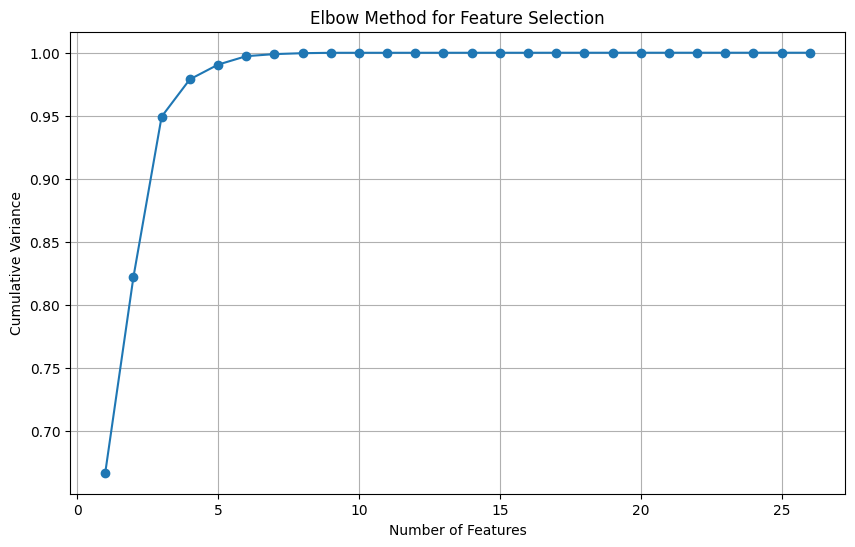

In [58]:
feature_variances = X_train.var()
sorted_variances = feature_variances.sort_values(ascending=False)

cumulative_variance = sorted_variances.cumsum() / sorted_variances.sum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance.values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance')
plt.title('Elbow Method for Feature Selection')
plt.grid(True)
plt.show()

<span style="font-size:20px">I have taken value of K as 6 because from 5 to 6 there is increase but from 6 to 7 there is not that much increase in variance.</span>

In [59]:
top_k_features = combined_sorted.head(6)['feature'].tolist()

print(top_k_features)

['HasSocialNet', 'IsHTTPS', 'HasCopyrightInfo', 'NoOfSelfRef', 'HasDescription', 'URLLength']


# Model Selection

In [60]:
def plot_learning_curve(
    model, X, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    title="Learning Curve"
):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        shuffle=shuffle,
        random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize())
    plt.legend()
    plt.show()

## Random Forest

Training Accuracy: 0.9953
Testing Accuracy: 0.9935

Classification Report:

              precision    recall  f1-score   support

           0     0.9923    0.9925    0.9924     30151
           1     0.9945    0.9943    0.9944     40588

    accuracy                         0.9935     70739
   macro avg     0.9934    0.9934    0.9934     70739
weighted avg     0.9935    0.9935    0.9935     70739



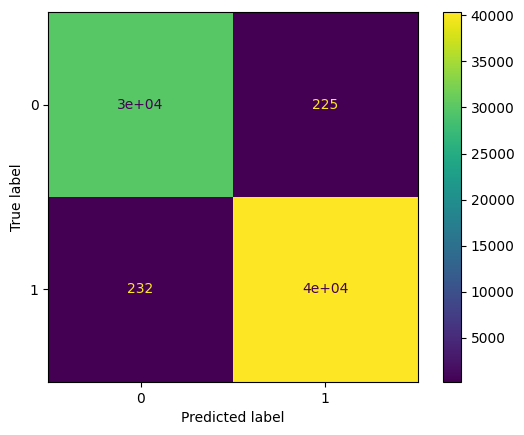

In [61]:
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

y_train_pred = rf_model.predict(X_train_selected)
y_test_pred = rf_model.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

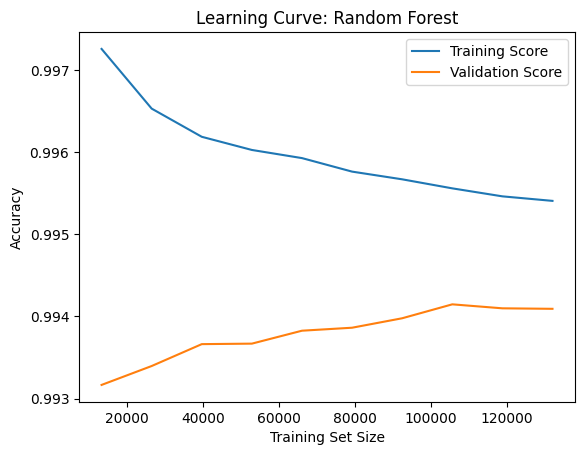

In [62]:
plot_learning_curve(
    model=rf_model,
    X=X_train_selected,
    y=y_train,
    title="Learning Curve: Random Forest"
)

## Decision Trees

Training Accuracy: 0.9953
Testing Accuracy: 0.9931

Classification Report:

              precision    recall  f1-score   support

           0     0.9909    0.9929    0.9919     30151
           1     0.9947    0.9932    0.9940     40588

    accuracy                         0.9931     70739
   macro avg     0.9928    0.9931    0.9930     70739
weighted avg     0.9931    0.9931    0.9931     70739



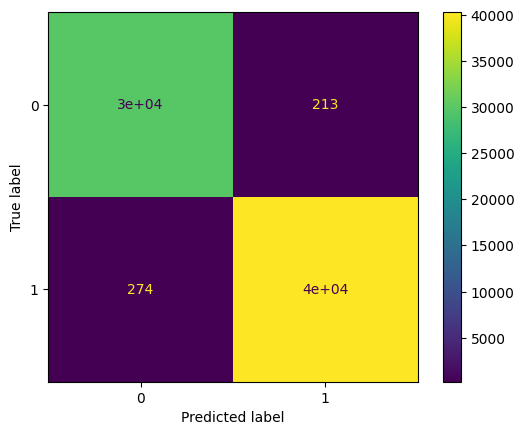

In [63]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train)

y_train_pred = dt_model.predict(X_train_selected)
y_test_pred = dt_model.predict(X_test_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

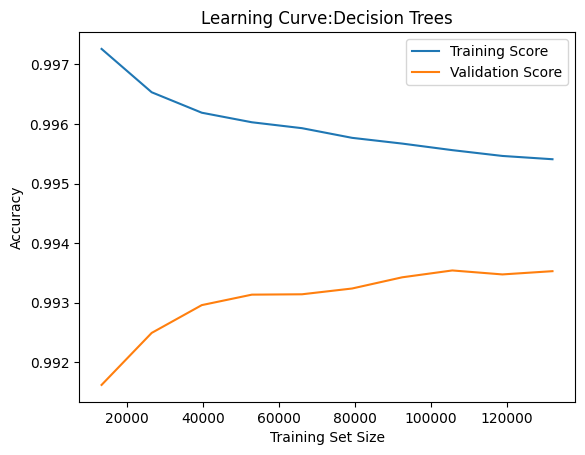

In [64]:
plot_learning_curve(
    model=dt_model,
    X=X_train_selected,
    y=y_train,
    title="Learning Curve:Decision Trees"
)

## Extra Trees

Training Accuracy: 0.9953
Testing Accuracy: 0.9932

Classification Report:

              precision    recall  f1-score   support

           0     0.9914    0.9928    0.9921     30151
           1     0.9946    0.9936    0.9941     40588

    accuracy                         0.9932     70739
   macro avg     0.9930    0.9932    0.9931     70739
weighted avg     0.9932    0.9932    0.9932     70739



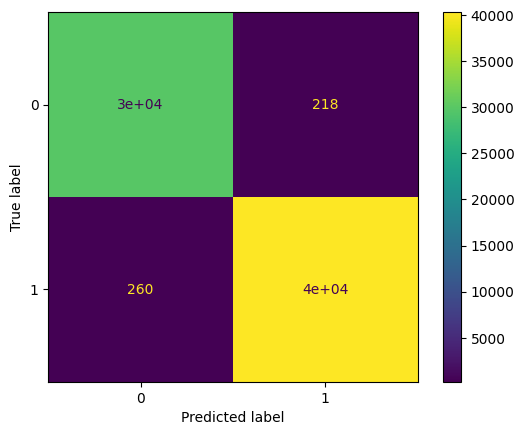

In [65]:
etc_model = ExtraTreesClassifier(random_state=42)
etc_model.fit(X_train_selected, y_train)
y_train_pred = etc_model.predict(X_train_selected)
y_test_pred = etc_model.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

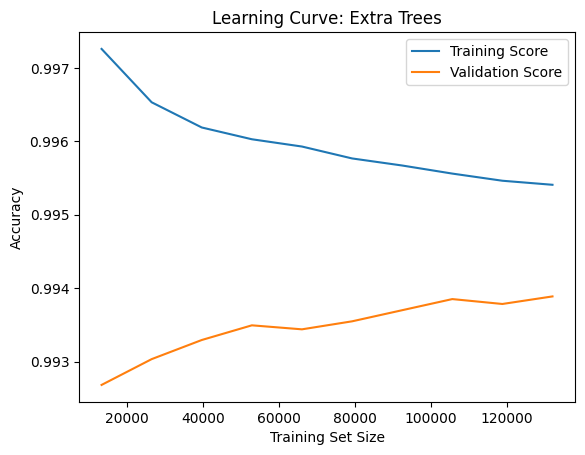

In [66]:
plot_learning_curve(
    model=etc_model,
    X=X_train_selected,
    y=y_train,
    title="Learning Curve: Extra Trees"
)

## XGBoost

Training Accuracy: 0.9939
Testing Accuracy: 0.9934

Classification Report:

              precision    recall  f1-score   support

           0     0.9915    0.9930    0.9922     30151
           1     0.9948    0.9936    0.9942     40588

    accuracy                         0.9934     70739
   macro avg     0.9931    0.9933    0.9932     70739
weighted avg     0.9934    0.9934    0.9934     70739



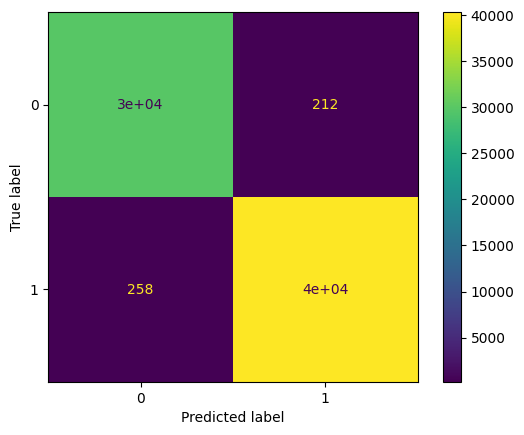

In [67]:
xgb_model = XGBClassifier(
    random_state=42,
    max_depth=2,
    n_estimators=50,
    learning_rate=0.5
)
xgb_model.fit(X_train_selected, y_train)
y_train_pred = xgb_model.predict(X_train_selected)
y_test_pred = xgb_model.predict(X_test_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

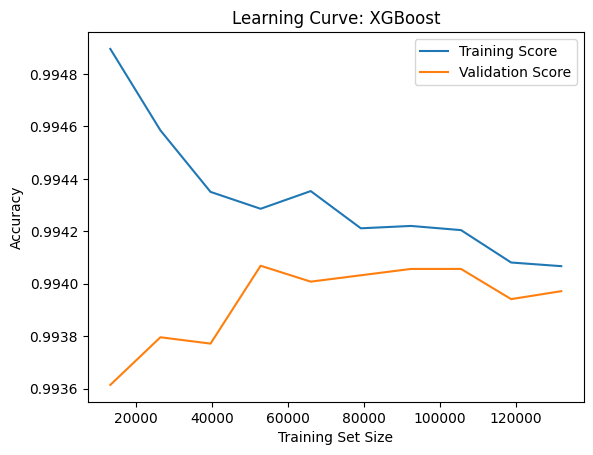

In [68]:
plot_learning_curve(
    model=xgb_model,
    X=X_train_selected,
    y=y_train,
    title="Learning Curve: XGBoost"
)

## K-Nearest Neighbors

Training Accuracy: 0.9933
Testing Accuracy: 0.9924

Classification Report:

              precision    recall  f1-score   support

           0     0.9919    0.9903    0.9911     30151
           1     0.9928    0.9940    0.9934     40588

    accuracy                         0.9924     70739
   macro avg     0.9923    0.9921    0.9922     70739
weighted avg     0.9924    0.9924    0.9924     70739



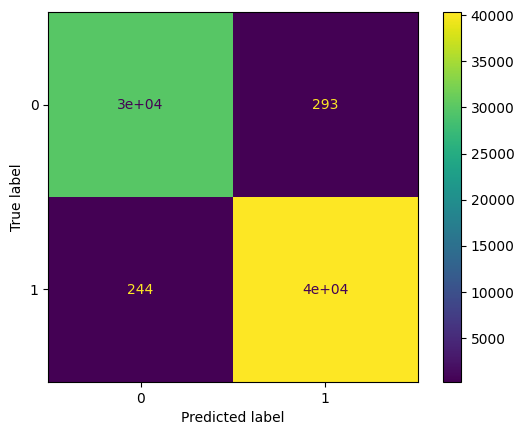

In [69]:
knn_model = KNeighborsClassifier(n_neighbors=7) 
knn_model.fit(X_train_selected, y_train)
y_train_pred = knn_model.predict(X_train_selected)
y_test_pred = knn_model.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

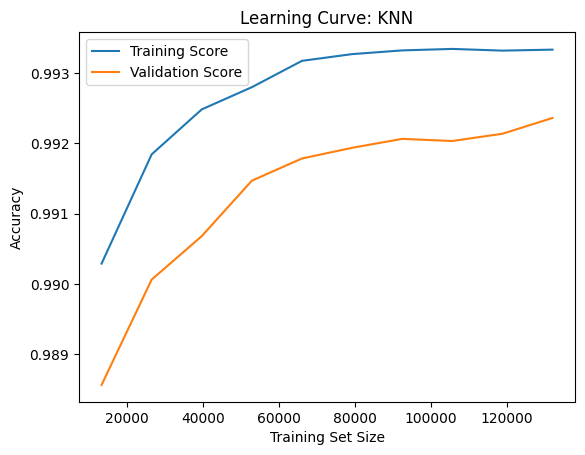

In [70]:
plot_learning_curve(
    model=knn_model,
    X=X_train_selected,
    y=y_train,
    title="Learning Curve: KNN"
)

In [71]:
model_names = ['Random Forest', 'Decision Tree', 'Extra Trees', 'XGBoost', 'KNN']
models = [rf_model, dt_model, etc_model, xgb_model, knn_model]

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in zip(model_names, models):
    y_pred = model.predict(X_test_selected)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))  
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

df_metrics = pd.DataFrame(metrics)

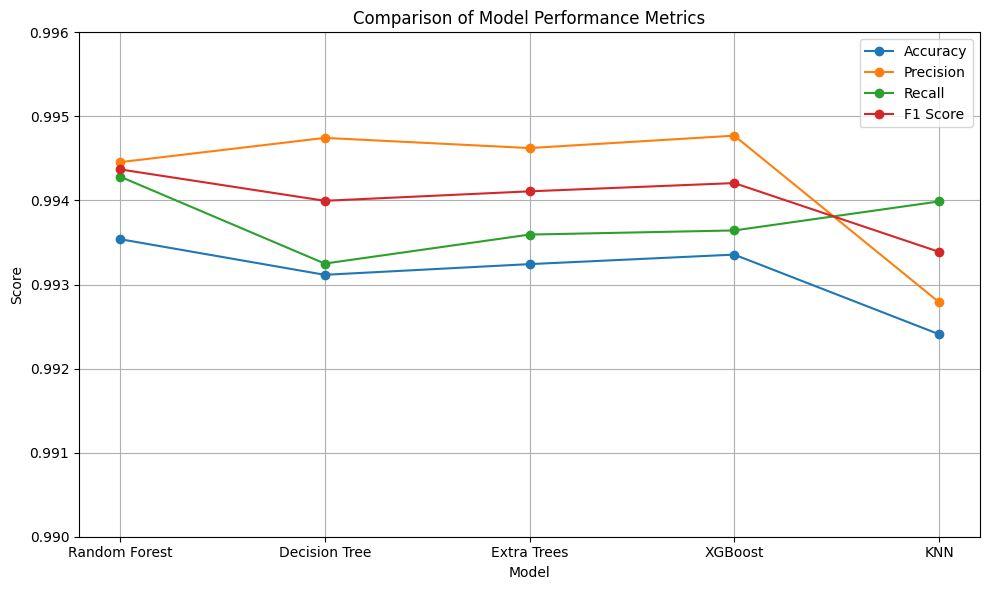

In [72]:
plt.figure(figsize=(10, 6))

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(df_metrics['Model'], df_metrics[metric], marker='o', label=metric)

plt.title("Comparison of Model Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0.99, 0.996)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="font-size:20px">Optimal choice is Random Forest.<br>It may seem XGBoost is performing well but XGboost is prone to give very much optimistic results and its training accuracy is less than Ramdom Forest, Decision Trees and Extra Trees. <br>KNN has low training accuracy.<br>Random Forest compared to Decision and Extra Trees is less overfitting. </span>

# Model Training

## Hyperparameter Tuning

<span style="font-size:20px">I am using Randomized Search CV for finding optimal settings for my model. It incorporates cross-validation to evaluate each sampled combination's performance, providing a robust estimate of how well the model will generalize to unseen data. By randomly exploring hyperparameter settings and assessing their performance through cross-validation, Randomized Search CV identifies the best configuration for a machine learning model.</span>

In [73]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,       
    verbose=2,
    random_state=42,
    n_jobs=-1  
)

In [74]:
rf_random.fit(X_train_selected, y_train)
cv_results = pd.DataFrame(rf_random.cv_results_)

cv_results_table = cv_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                               'param_min_samples_leaf', 'param_max_features', 'param_bootstrap', 
                               'mean_test_score']]

cv_results_table = cv_results_table.sort_values(by='mean_test_score', ascending=False)

print(cv_results_table[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                        'param_min_samples_leaf', 'param_max_features', 'param_bootstrap', 
                        'mean_test_score']])


Fitting 5 folds for each of 10 candidates, totalling 50 fits
   param_n_estimators param_max_depth  param_min_samples_split  \
3                 500              30                        2   
8                 200              30                        2   
7                 200            None                        2   
9                 400              30                        5   
6                 500              10                        5   
5                 100              20                        2   
4                 100              20                        5   
2                 100            None                        5   
0                 200              20                        2   
1                 500              40                        2   

   param_min_samples_leaf param_max_features  param_bootstrap  mean_test_score  
3                       4               log2            False         0.994269  
8                       2               log2      

In [75]:
best_rf_model = rf_random.best_estimator_
best_rf_model.class_weight = "balanced"
y_train_pred = best_rf_model.predict(X_train_selected)
y_test_pred = best_rf_model.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9950
Testing Accuracy: 0.9938



Classification Report:

              precision    recall  f1-score   support

           0     0.9931    0.9924    0.9927     30151
           1     0.9943    0.9949    0.9946     40588

    accuracy                         0.9938     70739
   macro avg     0.9937    0.9936    0.9937     70739
weighted avg     0.9938    0.9938    0.9938     70739



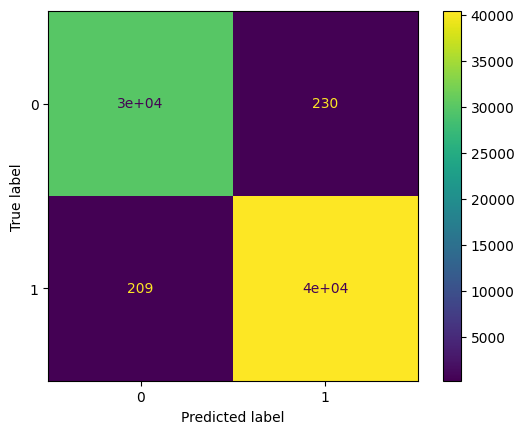

In [76]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

## Reducing FP rate 

<span style="font-size:20px">I will priortize FNs over FPs, meaning it will be okay if the model identifies legit URL as phishing but phishing URL should not be identified as legit. I need to reduce the FP rate and find the proper threshold on which we get optimal output.<br>
This is Threshold tuning where I am moving the decision boundary.</span>

In [77]:
y_test_prob = best_rf_model.predict_proba(X_test_selected)[:, 1]
thresholds = np.arange(0.6, 0.91, 0.02)

results = []

for thresh in thresholds:
    y_pred_thresh = (y_test_prob >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()
    
    results.append({
        'Threshold': round(thresh, 2),
        'FP': fp,
        'FN': fn
    })

results_df = pd.DataFrame(results)

print(results_df.sort_values(by=['FP', 'Threshold']).to_string(index=False))

 Threshold  FP  FN
      0.90  73 794
      0.88  77 740
      0.86  78 658
      0.84  82 581
      0.82  88 531
      0.80  94 491
      0.78  99 463
      0.76 109 433
      0.74 117 384
      0.72 122 369
      0.70 132 343
      0.68 133 335
      0.66 149 302
      0.64 151 300
      0.62 166 273
      0.60 184 253


<span style="font-size:20px">I have chosen threshold of 0.6 because selecting 0.9 though will give us less FP but FN has spiked, therefore such threshold are not optimal.</span>

# Final Analysis

Training Accuracy at threshold 0.6: 0.9949
Testing Accuracy at threshold 0.6: 0.9938

Testing Classification Report:
              precision    recall  f1-score   support

           0     0.9916    0.9939    0.9928     30151
           1     0.9955    0.9938    0.9946     40588

    accuracy                         0.9938     70739
   macro avg     0.9935    0.9938    0.9937     70739
weighted avg     0.9938    0.9938    0.9938     70739



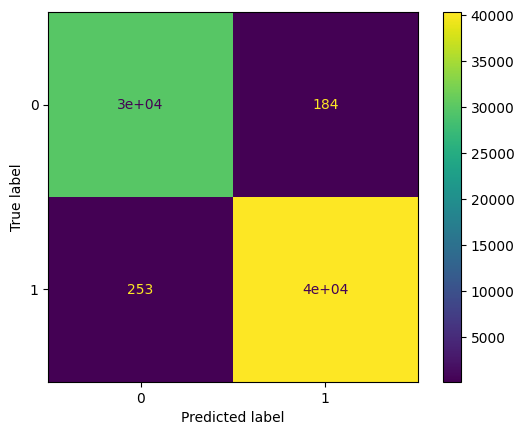

In [78]:
y_train_prob = best_rf_model.predict_proba(X_train_selected)[:, 1]
y_test_prob = best_rf_model.predict_proba(X_test_selected)[:, 1]

threshold = 0.6
y_train_pred_final = (y_train_prob >= threshold).astype(int)
y_test_pred_final = (y_test_prob >= threshold).astype(int)

print(f"Training Accuracy at threshold {threshold}: {accuracy_score(y_train, y_train_pred_final):.4f}")
print(f"Testing Accuracy at threshold {threshold}: {accuracy_score(y_test, y_test_pred_final):.4f}")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final)

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_final, digits=4))

<span style="font-size:20px">The precision, recall, and F1-score are 0.99 for both class 0 and class 1. This indicates that the model performs almost perfectly in classifying both classes, with very few false positives and false negatives.<br>The support values (30151 and 40588) show that the classes are reasonably balanced, though there are slightly more instances of class 1. The weighted average metrics in the classification report take this class imbalance into account.</span>

Testing Accuracy at threshold 0.6: 0.9938
Testing AUC: 0.9995
Testing LogLoss: 0.0229


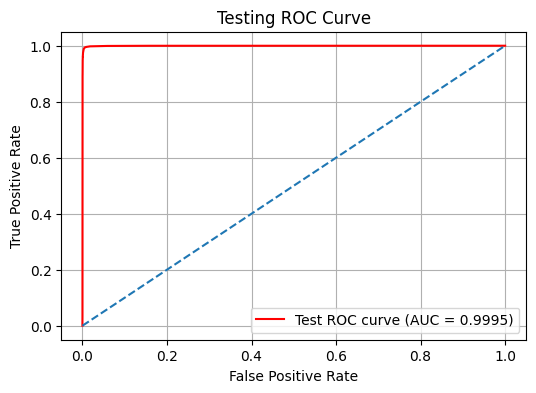

In [79]:
print(f"Testing Accuracy at threshold {threshold}: {accuracy_score(y_test, y_test_pred_final):.4f}")
test_auc = roc_auc_score(y_test, y_test_prob)
test_logloss = log_loss(y_test, y_test_prob)
print(f"Testing AUC: {test_auc:.4f}")
print(f"Testing LogLoss: {test_logloss:.4f}")

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {test_auc:.4f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC Curve')
plt.legend()
plt.grid()
plt.show()

<span style="font-size:20px">The red line represents the ROC curve. The ROC curve is very close to the ideal curve, hugging the top-left corner. This shows that the model has a very high ability to distinguish between positive and negative classes. <br>AUC ranges from 0 to 1, where 1 indicates perfect classification, 0.5 indicates performance no better than random chance, and values above 0.9 are generally considered excellent.
An AUC of 0.9995 is extremely high, indicating that the model is exceptionally good at distinguishing between the two classes.
</span>

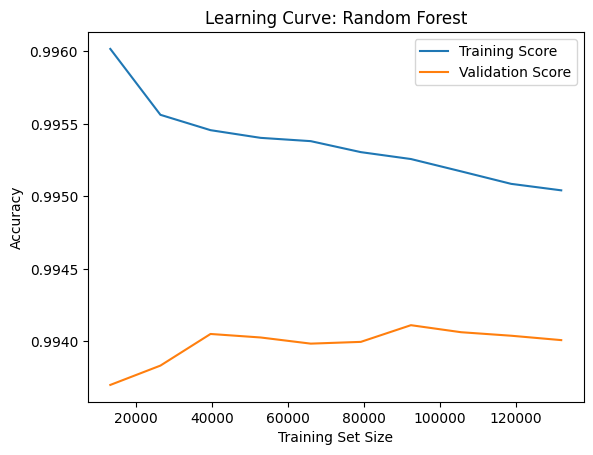

In [80]:
plot_learning_curve(
    model=best_rf_model,
    X=X_train_selected,
    y=y_train,
    title="Learning Curve: Random Forest"
)

<span style="font-size:20px">The decrease in accuracy of training score as the set size increase is showing that model is generalizing well. Validation score is also increasing with set size which indicates it is generalizing good on unseen data. Also gap between both scores is less meaning model is not suffering overfitting. Both curves seem to plateau as the training set size increases. This suggests that adding more data may not significantly improve the model's performance.</span>

In [81]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

# Saving the model